In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:
xls = pd.ExcelFile('General Stats.xlsx')

In [5]:
general = pd.read_excel(xls, 'General')
advanced = pd.read_excel(xls, 'Advanced')
defense_overall = pd.read_excel(xls, 'Overall Defensive Dashboard')
defense_3pt = pd.read_excel(xls, '3pt Defensive Dashboard')
defense_6ft = pd.read_excel(xls, '< 6ft Defensive Dashboard')
defense_10ft = pd.read_excel(xls, '< 10ft Defensive Dashboard')
defense_15ft = pd.read_excel(xls, '> 15ft Defensive Dashboard')
hustle = pd.read_excel(xls, 'Hustle')
shooting = pd.read_excel(xls, 'Shooting')
isolation = pd.read_excel(xls, 'Isolation')
pnr_handler = pd.read_excel(xls, 'PnR Ball Handler')
pnr_roll = pd.read_excel(xls, 'PnR Roll Man')
transition = pd.read_excel(xls, 'Transition')
post_up = pd.read_excel(xls, 'Post Up')
spot_up = pd.read_excel(xls, 'Spot Up')
handoff = pd.read_excel(xls, 'Handoff')
cut = pd.read_excel(xls, 'Cut')
off_screen = pd.read_excel(xls, 'Off Screen')
putback = pd.read_excel(xls, 'Putback')
passing = pd.read_excel(xls, 'Passing')

In [6]:
advanced.rename({'TO\xa0RATIO' : 'TO RATIO'}, axis = 1, inplace = True)
advanced.rename({'AST\xa0RATIO' : 'AST RATIO'}, axis = 1, inplace = True)

def change_name_defense(df, shot_type):
    for feature in ['FREQ', 'DFGM', 'DFGA', 'DFG%', 'FG%', 'DIFF%']:
        df.rename({feature : shot_type + '_' + feature}, axis = 1, inplace = True)
change_name_defense(defense_overall, 'OVERALL')
change_name_defense(defense_3pt, '3PT')
change_name_defense(defense_6ft, '6FT')
change_name_defense(defense_10ft, '10FT')
change_name_defense(defense_15ft, '15FT')

hustle.rename({'SCREEN' : 'SCREEN ASSISTS',
               'SCREEN.1' : 'SCREEN ASSISTS PTS',
               'OFF LOOSE BALLS' : 'OFF LOOSE BALLS RECOVERED',
               'DEF LOOSE BALLS' : 'DEF LOOSE BALLS RECOVERED',
               'LOOSE BALLS' : 'LOOSE BALLS RECOVERED',
               '% LOOSE BALLS' : '% LOOSE BALLS RECOVERED OFF',
               '% LOOSE BALLS.1' : '% LOOSE BALLS RECOVERED DEF',
               'CHARGES' : 'CHARGES DRAWN',
               'CONTESTED' : 'CONTESTED 2PT SHOTS',
               'CONTESTED.1' : 'CONTESTED 3PT SHOTS',
               'CONTESTED.2' : 'CONTESTED SHOTS'}, axis = 1, inplace = True)
hustle.drop(0, inplace = True)
hustle.replace('-', 0, inplace = True)
hustle[['SCREEN ASSISTS', 'SCREEN ASSISTS PTS', 'DEFLECTIONS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED',
        'LOOSE BALLS RECOVERED', '% LOOSE BALLS RECOVERED OFF', '% LOOSE BALLS RECOVERED DEF', 'CHARGES DRAWN', 'CONTESTED 2PT SHOTS',
        'CONTESTED 3PT SHOTS', 'CONTESTED SHOTS']] = hustle[['SCREEN ASSISTS', 'SCREEN ASSISTS PTS', 'DEFLECTIONS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED',
                                                             'LOOSE BALLS RECOVERED', '% LOOSE BALLS RECOVERED OFF', '% LOOSE BALLS RECOVERED DEF', 'CHARGES DRAWN', 'CONTESTED 2PT SHOTS',
                                                             'CONTESTED 3PT SHOTS', 'CONTESTED SHOTS']].astype('float')

shooting.reset_index(inplace = True)
shooting.rename({'level_0' : 'PLAYER',
                 'level_1' : 'TEAM',   
                 'level_2' : 'AGE',
                 'LESS\xa0THAN\xa05FT.' : 'FGM_<5',
                 'Unnamed: 1' : 'FGA_<5',
                 'Unnamed: 2' : 'FG%_<5',
                 '5-9\xa0FT.' : 'FGM_5-9',
                 'Unnamed: 4' : 'FGA_5-9',
                 'Unnamed: 5' : 'FG%_5-9',
                 '10-14\xa0FT.' : 'FGM_10-14',
                 'Unnamed: 7' : 'FGA_10-14',
                 'Unnamed: 8' : 'FG%_10-14',
                 '15-19\xa0FT.' : 'FGM_15-19',
                 'Unnamed: 10' : 'FGA_15-19',
                 'Unnamed: 11' : 'FG%_15-19',
                 '20-24\xa0FT.' : 'FGM_20-24',
                 'Unnamed: 13' : 'FGA_20-24',
                 'Unnamed: 14' : 'FG%_20-24',
                 '25-29\xa0FT.' : 'FGM_25-29',
                 'Unnamed: 16' : 'FGA_25-29',
                 'Unnamed: 17' : 'FG%_25-29'}, axis = 1, inplace = True)
shooting.fillna(0, inplace = True)
shooting.drop(0, inplace = True)
shooting.replace('-', 0, inplace = True)
shooting[['FGM_<5', 'FGA_<5', 'FG%_<5', 'FGM_5-9', 'FGA_5-9', 'FG%_5-9', 'FGM_10-14', 'FGA_10-14', 'FG%_10-14', 'FGM_15-19', 'FGA_15-19',
          'FG%_15-19', 'FGM_20-24', 'FGA_20-24', 'FG%_20-24', 'FGM_25-29', 'FGA_25-29', 'FG%_25-29']] = shooting[['FGM_<5', 'FGA_<5', 'FG%_<5', 'FGM_5-9', 'FGA_5-9', 'FG%_5-9', 'FGM_10-14', 'FGA_10-14', 'FG%_10-14', 'FGM_15-19', 'FGA_15-19',
                                                                                                                 'FG%_15-19', 'FGM_20-24', 'FGA_20-24', 'FG%_20-24', 'FGM_25-29', 'FGA_25-29', 'FG%_25-29']].astype('float')

def change_name_poss(df, poss_type):
    for feature in ['FT', 'TOV', 'SF', 'AND\xa0ONE', 'SCORE']:
        df.rename({feature : poss_type + '_' + feature + '_FREQ'}, axis = 1, inplace = True)
    for feature in ['POSS', 'FREQ', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'EFG%', 'PERCENTILE']:
        df.rename({feature : poss_type + '_' + feature}, axis = 1, inplace = True)
    df.drop(0, inplace = True)
change_name_poss(isolation, 'ISOLATION')
change_name_poss(pnr_handler, 'PNR_HANDLER')
change_name_poss(pnr_roll, 'PNR_ROLL')
change_name_poss(transition, 'TRANSITION')
change_name_poss(post_up, 'POST_UP')
change_name_poss(spot_up, 'SPOT_UP')
change_name_poss(handoff, 'HANDOFF')
change_name_poss(cut, 'CUT')
change_name_poss(off_screen, 'OFF_SCREEN')
change_name_poss(putback, 'PUTBACK')

passing.rename({'PASSES' : 'PASSES MADE',
                'PASSES.1' : 'PASSES RECEIVED',
                'SECONDARY' : 'SECONDARY AST',
                'POTENTIAL' : 'POTENTIAL AST',
                'AST\xa0PTS' : 'AST PTS CREATED',
                'AST.1' : 'AST ADJ',
                'AST\xa0TO' : 'AST TO PASS%',
                'AST\xa0TO.1' : 'AST TO PASS% ADJ'}, axis = 1, inplace = True)
passing.drop(0, inplace = True)
passing.replace('-', 0, inplace = True)
passing[['PASSES MADE', 'PASSES RECEIVED', 'AST', 'SECONDARY AST', 'POTENTIAL AST',
         'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ']] = passing[['PASSES MADE', 'PASSES RECEIVED', 'AST', 'SECONDARY AST', 'POTENTIAL AST',
                                                                                       'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ']].astype('float')                                                                                       

ValueError: could not convert string to float: &#39;ORL&#39;

In [5]:
def HeatMap(df):
    plt.figure(figsize = (10,10))
    sns.heatmap(df.corr(),
                vmin = -1, vmax = 1, center = 0,
                cmap = sns.diverging_palette(20, 220, n = 200),
                square = True)

In [6]:
# General

In [7]:
print(general.shape)
general.head()

(530, 29)


,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
1,James Harden,HOU,29,78,51,27,36.8,36.1,10.8,24.5,44.2,4.8,13.2,36.8,9.7,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,3.1,58.7,34,7,4.6
2,Paul George,OKC,29,77,46,31,36.9,28.0,9.2,21.0,43.8,3.8,9.8,38.6,5.9,7.0,83.9,1.4,6.8,8.2,4.1,2.7,2.2,0.4,2.8,49.3,24,1,6.4
3,Giannis Antetokounmpo,MIL,24,72,56,16,32.8,27.7,10.0,17.3,57.8,0.7,2.8,25.6,6.9,9.5,72.9,2.2,10.3,12.5,5.9,3.7,1.3,1.5,3.2,56.2,54,5,9.1
4,Joel Embiid,PHI,25,64,43,21,33.7,27.5,9.1,18.7,48.4,1.2,4.1,30.0,8.2,10.1,80.4,2.5,11.1,13.6,3.7,3.5,0.7,1.9,3.3,53.7,58,2,5.8
5,LeBron James,LAL,34,55,28,27,35.2,27.4,10.1,19.9,51.0,2.0,5.9,33.9,5.1,7.6,66.5,1.0,7.4,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1


In [8]:
general[general['TEAM'] == 'MIN']

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
15,Karl-Anthony Towns,MIN,23,77,34,43,33.0,24.4,8.8,17.1,51.8,1.8,4.6,40.0,4.9,5.8,83.6,3.4,9.0,12.4,3.4,3.1,0.9,1.6,3.8,48.7,54,0,0.7
46,Andrew Wiggins,MIN,24,73,31,42,34.8,18.1,6.8,16.6,41.2,1.6,4.8,33.9,2.8,4.1,69.9,1.1,3.7,4.8,2.5,1.9,1.0,0.7,2.1,30.6,3,0,-0.9
49,Derrick Rose,MIN,30,51,24,27,27.3,18.0,7.1,14.8,48.2,1.1,2.9,37.0,2.7,3.1,85.6,0.6,2.1,2.7,4.3,1.6,0.6,0.2,1.1,28.7,1,0,0.7
109,Robert Covington,MIN,28,35,20,15,34.4,13.3,4.5,10.3,43.1,2.4,6.4,37.8,1.9,2.5,76.4,0.8,4.7,5.5,1.3,1.3,2.1,1.3,3.6,30.9,2,0,1.8
124,Jeff Teague,MIN,31,42,23,19,30.1,12.1,4.2,9.9,42.3,0.8,2.5,33.3,2.9,3.6,80.4,0.4,2.1,2.5,8.2,2.3,1.0,0.4,2.1,29.5,11,0,0.0
156,Taj Gibson,MIN,34,70,32,38,24.1,10.8,4.3,7.7,56.6,0.2,0.5,32.4,1.9,2.5,75.7,2.5,4.1,6.5,1.2,1.0,0.8,0.6,2.7,23.3,13,0,-1.2
159,Dario Saric,MIN,25,81,39,42,25.0,10.6,3.8,8.6,43.7,1.5,4.0,36.5,1.6,1.9,88.0,1.6,4.1,5.6,1.6,1.2,0.6,0.1,2.2,20.5,3,0,-0.8
236,Josh Okogie,MIN,20,74,32,42,23.7,7.7,2.6,6.9,38.6,0.8,2.9,27.9,1.6,2.2,72.8,0.6,2.4,2.9,1.2,0.9,1.2,0.4,2.2,17.1,1,0,-0.7
261,Luol Deng,MIN,34,22,11,11,17.8,7.1,2.7,5.4,50.0,0.6,2.0,31.8,1.1,1.6,71.4,0.9,2.4,3.3,0.8,0.6,0.7,0.4,1.1,14.8,0,0,4.0
271,Tyus Jones,MIN,23,68,29,39,22.9,6.9,2.7,6.6,41.5,0.6,1.9,31.7,0.9,1.0,84.1,0.3,1.6,2.0,4.8,0.7,1.2,0.1,1.1,19.6,5,0,0.0


In [9]:
general = general[(general['MIN'] >= 12) & (general['GP'] >= 10)]
general.reset_index(drop = True, inplace = True)
general.shape

(388, 29)

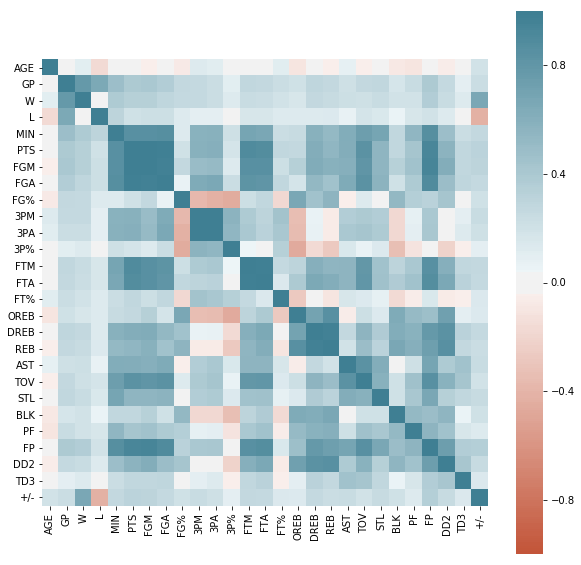

In [10]:
HeatMap(general)

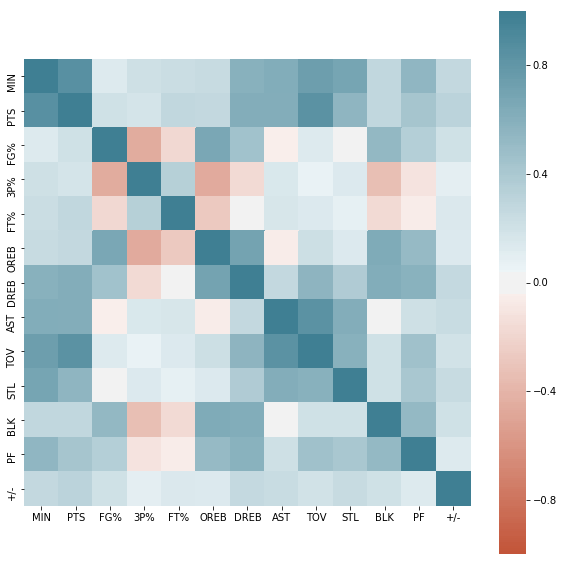

In [11]:
general.drop(['GP', 'W', 'L', 'FGA', 'FGM', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'FP', 'DD2', 'TD3'], axis = 1, inplace = True)
HeatMap(general.drop('AGE', axis = 1))

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = general.drop(['PLAYER', 'TEAM', 'AGE', 'TOV', 'PF', 'FT%'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

MIN     59.085091
PTS     17.386166
FG%     22.549634
3P%     13.447371
OREB     8.696516
DREB    15.918558
AST      6.423177
STL     10.316391
BLK      4.706850
+/-      1.143264
dtype: float64

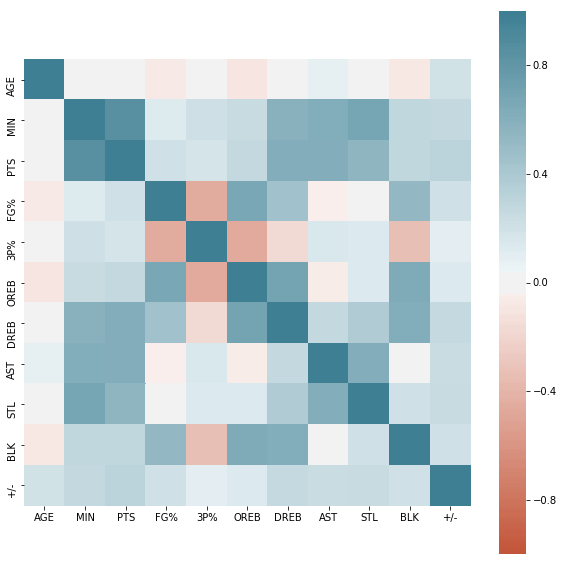

In [13]:
general.drop(['PF', 'TOV', 'FT%'], axis = 1, inplace = True)
HeatMap(general)

In [14]:
general.head()

,PLAYER,TEAM,AGE,MIN,PTS,FG%,3P%,OREB,DREB,AST,STL,BLK,+/-
0,James Harden,HOU,29,36.8,36.1,44.2,36.8,0.8,5.8,7.5,2.0,0.7,4.6
1,Paul George,OKC,29,36.9,28.0,43.8,38.6,1.4,6.8,4.1,2.2,0.4,6.4
2,Giannis Antetokounmpo,MIL,24,32.8,27.7,57.8,25.6,2.2,10.3,5.9,1.3,1.5,9.1
3,Joel Embiid,PHI,25,33.7,27.5,48.4,30.0,2.5,11.1,3.7,0.7,1.9,5.8
4,LeBron James,LAL,34,35.2,27.4,51.0,33.9,1.0,7.4,8.3,1.3,0.6,2.1


In [15]:
# Advanced

In [16]:
print(advanced.shape)
advanced.head()

(530, 22)


,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
1,Bam Adebayo,MIA,21,82,39,43,23.3,105.0,104.5,0.5,14.6,1.52,20.7,8.3,22.1,15.1,13.6,57.9,62.3,15.7,99.50,13.3
1,Bradley Beal,WAS,26,82,32,50,36.9,111.6,113.5,-1.8,23.3,2.00,18.2,2.8,10.4,6.6,9.1,54.0,58.1,27.7,102.80,12.8
1,Bryn Forbes,SAS,25,82,48,34,28.0,109.9,110.2,-0.3,10.5,2.19,16.3,0.8,9.6,5.3,7.5,56.8,58.6,17.1,99.21,7.7
1,Buddy Hield,SAC,26,82,39,43,31.9,109.4,110.0,-0.6,11.7,1.40,11.5,3.6,11.0,7.2,8.2,56.0,58.7,24.3,104.94,11.0
1,Collin Sexton,CLE,20,82,19,63,31.8,105.6,118.1,-12.5,15.4,1.31,13.9,2.1,7.2,4.5,10.6,48.0,52.0,24.7,98.54,7.3


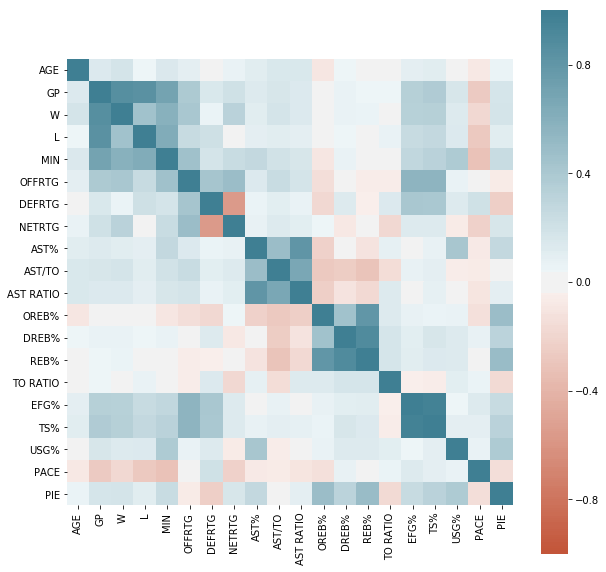

In [17]:
HeatMap(advanced)

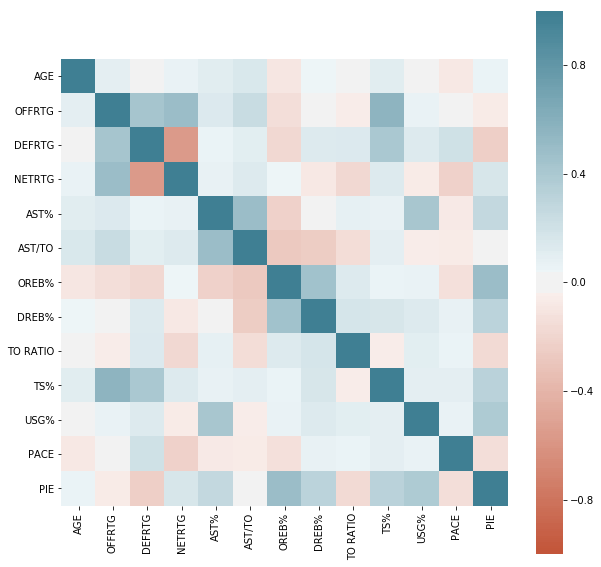

In [18]:
advanced.drop(['GP', 'W', 'L', 'MIN', 'AST RATIO', 'REB%', 'EFG%'], axis = 1, inplace = True)
HeatMap(advanced)

In [19]:
X = advanced.drop(['PLAYER', 'TEAM', 'NETRTG', 'PACE', 'OFFRTG', 'DEFRTG', 'AGE'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])], index=X.columns)

AST%         6.8
AST/TO       5.5
OREB%        4.3
DREB%        7.0
TO RATIO     7.3
TS%         15.9
USG%        14.0
PIE          7.0
dtype: float64

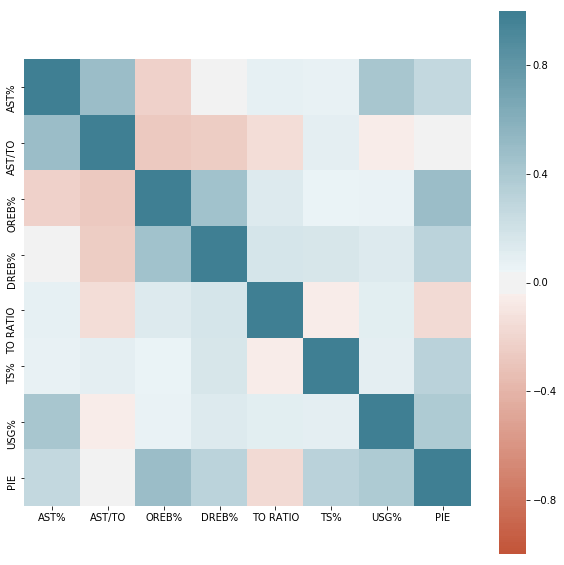

In [20]:
advanced.drop(['NETRTG', 'PACE', 'OFFRTG', 'DEFRTG', 'AGE'], axis = 1, inplace = True)
HeatMap(advanced)

In [21]:
advanced.head()

,PLAYER,TEAM,AST%,AST/TO,OREB%,DREB%,TO RATIO,TS%,USG%,PIE
1,Bam Adebayo,MIA,14.6,1.52,8.3,22.1,13.6,62.3,15.7,13.3
1,Bradley Beal,WAS,23.3,2.00,2.8,10.4,9.1,58.1,27.7,12.8
1,Bryn Forbes,SAS,10.5,2.19,0.8,9.6,7.5,58.6,17.1,7.7
1,Buddy Hield,SAC,11.7,1.40,3.6,11.0,8.2,58.7,24.3,11.0
1,Collin Sexton,CLE,15.4,1.31,2.1,7.2,10.6,52.0,24.7,7.3


In [22]:
# Defense

In [23]:
defense_overall.drop(['G', 'GP'], axis = 1, inplace = True)
defense_3pt.drop(['G', 'GP'], axis = 1, inplace = True)
defense_6ft.drop(['G', 'GP'], axis = 1, inplace = True)
defense_10ft.drop(['G', 'GP'], axis = 1, inplace = True)
defense_15ft.drop(['G', 'GP'], axis = 1, inplace = True)

In [24]:
defense = defense_overall.merge(defense_3pt, how = 'left')
defense = defense.merge(defense_6ft, how = 'left')
defense = defense.merge(defense_10ft, how = 'left')
defense = defense.merge(defense_15ft, how = 'left')
defense.fillna(0, inplace = True)
print(defense.shape)
defense.head()

(524, 34)


,PLAYER,TEAM,AGE,POSITION,OVERALL_FREQ,OVERALL_DFGM,OVERALL_DFGA,OVERALL_DFG%,OVERALL_FG%,OVERALL_DIFF%,3PT_FREQ,3PT_DFGM,3PT_DFGA,3PT_DFG%,3PT_FG%,3PT_DIFF%,6FT_FREQ,6FT_DFGM,6FT_DFGA,6FT_DFG%,6FT_FG%,6FT_DIFF%,10FT_FREQ,10FT_DFGM,10FT_DFGA,10FT_DFG%,10FT_FG%,10FT_DIFF%,15FT_FREQ,15FT_DFGM,15FT_DFGA,15FT_DFG%,15FT_FG%,15FT_DIFF%
0,Joel Embiid,PHI,25,F-C,1,8.4,18.6,45.0,48.1,-3.1,0.205,1.4,3.8,37.5,34.6,2.9,0.495,4.8,9.2,52.2,61.6,-9.4,0.597,5.4,11.1,48.8,56.9,-8.1,0.325,2.3,6.1,38.3,36.0,2.3
1,Rudy Gobert,UTA,27,C,1,8.0,17.8,45.0,48.9,-3.9,0.147,0.9,2.6,35.9,34.4,1.5,0.488,4.5,8.7,51.6,62.6,-11.0,0.633,5.5,11.3,48.9,57.7,-8.8,0.266,1.9,4.8,39.2,36.3,2.9
2,Clint Capela,HOU,25,C,1,8.3,17.7,46.7,47.2,-0.4,0.242,1.4,4.3,33.3,35.0,-1.7,0.434,4.5,7.7,58.1,62.4,-4.2,0.566,5.5,10.0,54.5,57.3,-2.8,0.359,2.2,6.4,35.0,36.7,-1.7
3,Steven Adams,OKC,25,C,1,7.8,16.4,47.6,48.4,-0.9,0.230,1.3,3.8,33.9,35.2,-1.3,0.443,4.2,7.3,57.4,62.1,-4.7,0.569,5.1,9.3,55.0,57.4,-2.4,0.353,2.1,5.8,36.1,36.9,-0.8
4,Brook Lopez,MIL,31,C,1,7.3,16.2,44.9,48.8,-3.9,0.246,1.5,4.0,38.7,34.3,4.4,0.399,3.3,6.5,50.9,62.3,-11.5,0.540,4.2,8.7,47.9,57.3,-9.5,0.365,2.4,5.9,40.8,36.1,4.7


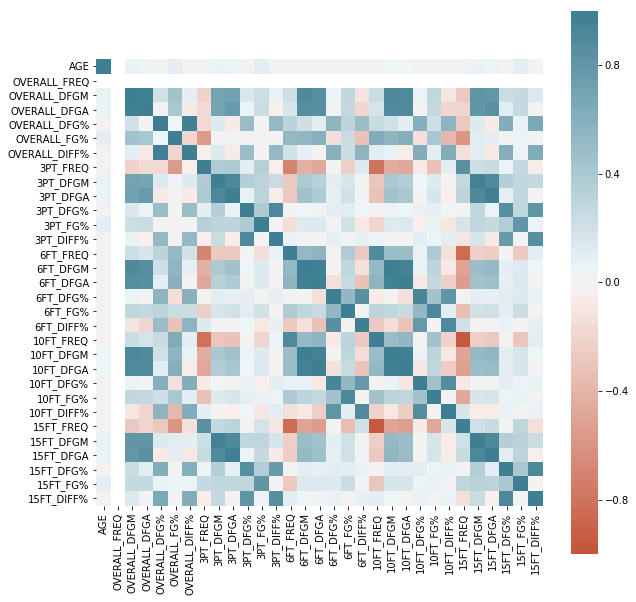

In [25]:
HeatMap(defense)

In [26]:
defense['6-9_DFGM'] = defense['10FT_DFGM'] - defense['6FT_DFGM']
defense['6-9_DFGA'] = defense['10FT_DFGA'] - defense['6FT_DFGA']
defense['6-9_DFG%'] = (defense['6-9_DFGM']/defense['6-9_DFGA']).round(3)*100
defense['6-9_FG%'] = defense['10FT_FG%']*2 - defense['6FT_FG%']
defense['6-9_DIFF%'] = defense['6-9_DFG%'] - defense['6-9_FG%']
defense['6-9_FREQ'] = (defense['6-9_DFGA']/defense['OVERALL_DFGA']*100).round(1)

In [27]:
defense['10-15_DFGM'] = (defense['OVERALL_DFGM'] - defense['10FT_DFGM'] - defense['15FT_DFGM']).round(1)
defense['10-15_DFGA'] = defense['OVERALL_DFGA'] - defense['10FT_DFGA'] - defense['15FT_DFGA']
defense['10-15_DFG%'] = (defense['10-15_DFGM']/defense['10-15_DFGA']).round(3)*100
defense['10-15_FG%'] = defense['OVERALL_FG%']*3 - defense['10FT_FG%'] - defense['15FT_FG%']
defense['10-15_DIFF%'] = (defense['10-15_DFG%'] - defense['10-15_FG%']).round(1)
defense['10-15_FREQ'] = (defense['10-15_DFGA']/defense['OVERALL_DFGA']*100).round(1)

In [28]:
defense['16-3PT_DFGM'] = defense['15FT_DFGM'] - defense['3PT_DFGM']
defense['16-3PT_DFGA'] = defense['15FT_DFGA'] - defense['3PT_DFGA']
defense['16-3PT_DFG%'] = (defense['16-3PT_DFGM']/defense['16-3PT_DFGA']).round(3)*100
defense['16-3PT_FG%'] = defense['15FT_FG%']*2 - defense['3PT_FG%']
defense['16-3PT_DIFF%'] = defense['16-3PT_DFG%'] - defense['16-3PT_FG%']
defense['16-3PT_FREQ'] = (defense['16-3PT_DFGA']/defense['OVERALL_DFGA']*100).round(1)

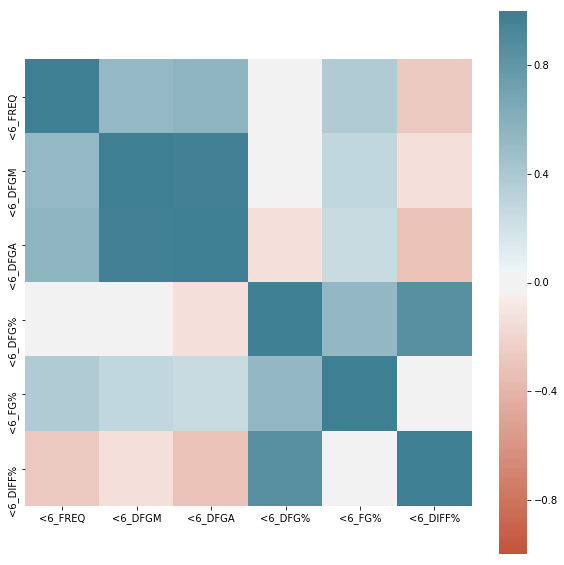

In [29]:
defense.rename({'6FT_FREQ' : '<6_FREQ', '6FT_DFGM' : '<6_DFGM', '6FT_DFGA' : '<6_DFGA', '6FT_DFG%' : '<6_DFG%', '6FT_FG%' : '<6_FG%', '6FT_DIFF%' : '<6_DIFF%'}, axis = 1, inplace = True)
defense['<6_FREQ'] = defense['<6_FREQ']*100
HeatMap(defense[['<6_FREQ', '<6_DFGM', '<6_DFGA', '<6_DFG%', '<6_FG%', '<6_DIFF%']])

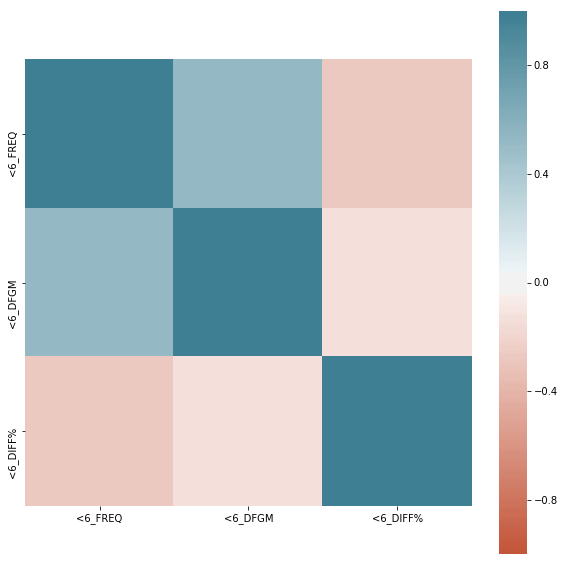

In [30]:
HeatMap(defense[['<6_FREQ', '<6_DFGM', '<6_DIFF%']])

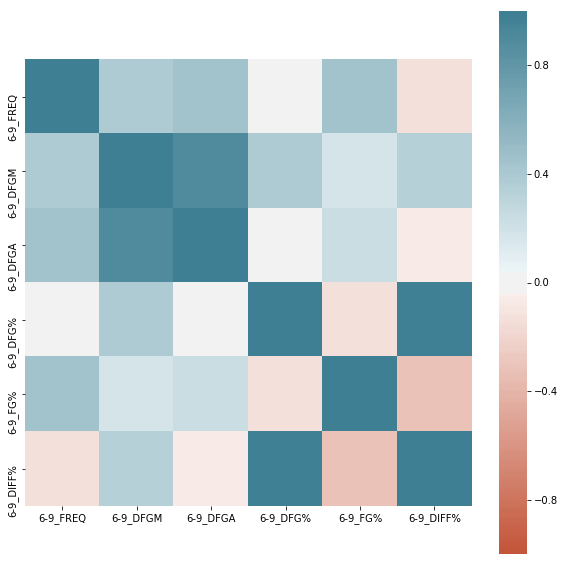

In [31]:
HeatMap(defense[['6-9_FREQ', '6-9_DFGM', '6-9_DFGA', '6-9_DFG%', '6-9_FG%', '6-9_DIFF%']])

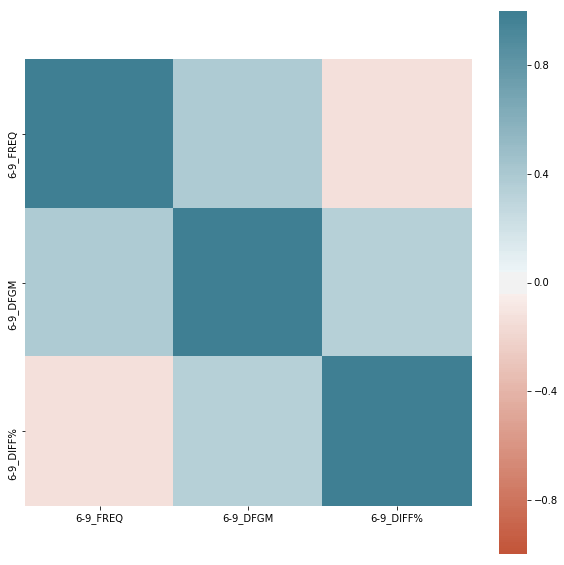

In [32]:
HeatMap(defense[['6-9_FREQ', '6-9_DFGM', '6-9_DIFF%']])

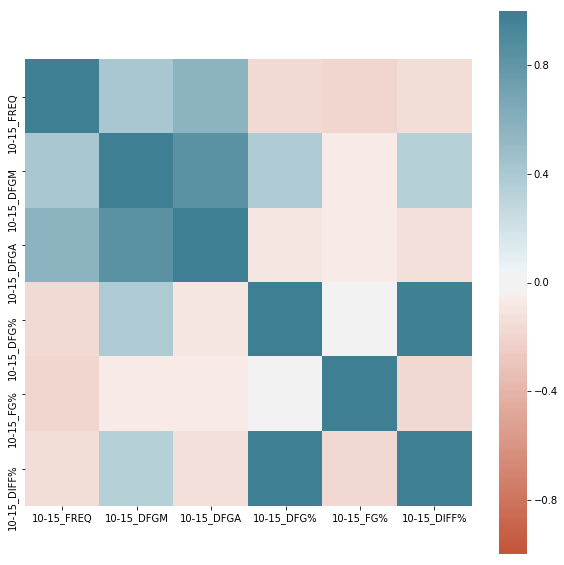

In [33]:
HeatMap(defense[['10-15_FREQ', '10-15_DFGM', '10-15_DFGA', '10-15_DFG%', '10-15_FG%', '10-15_DIFF%']])

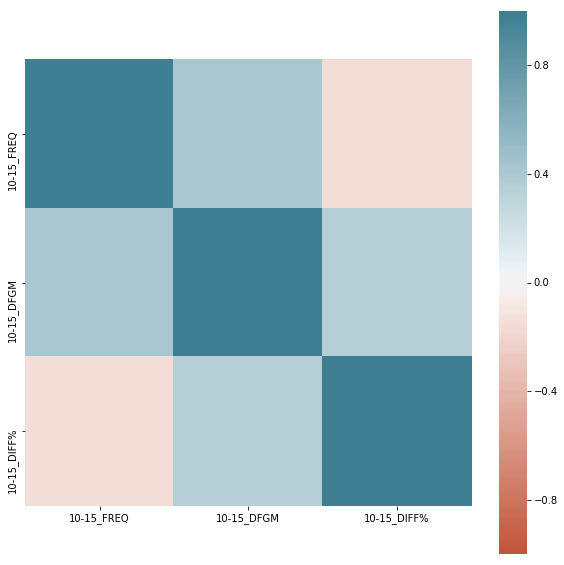

In [34]:
HeatMap(defense[['10-15_FREQ', '10-15_DFGM', '10-15_DIFF%']])

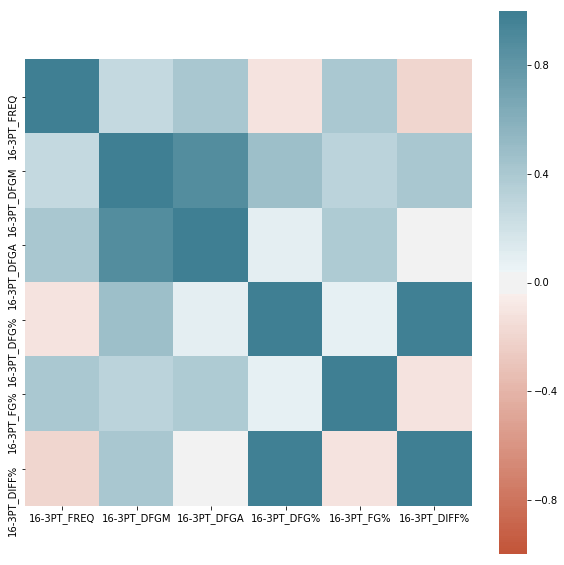

In [35]:
HeatMap(defense[['16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DFGA', '16-3PT_DFG%', '16-3PT_FG%', '16-3PT_DIFF%']])

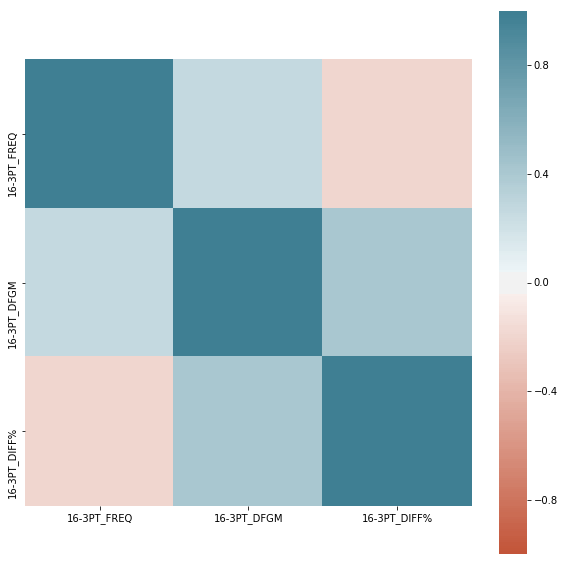

In [36]:
HeatMap(defense[['16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%']])

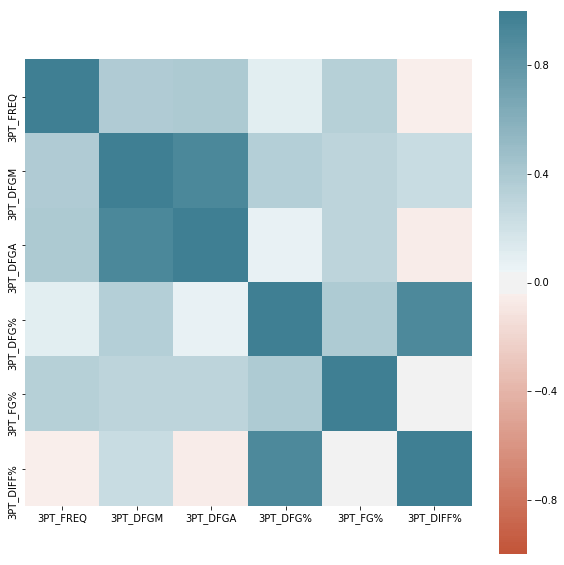

In [37]:
defense['3PT_FREQ'] = defense['3PT_FREQ']*100
HeatMap(defense[['3PT_FREQ', '3PT_DFGM', '3PT_DFGA', '3PT_DFG%', '3PT_FG%', '3PT_DIFF%']])

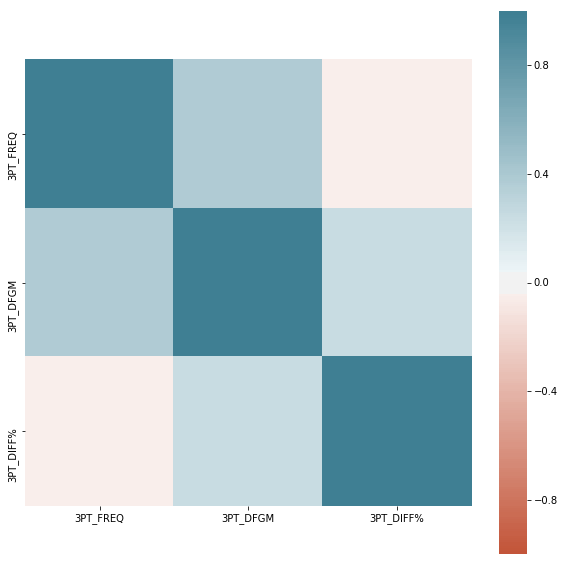

In [38]:
HeatMap(defense[['3PT_FREQ', '3PT_DFGM', '3PT_DIFF%']])

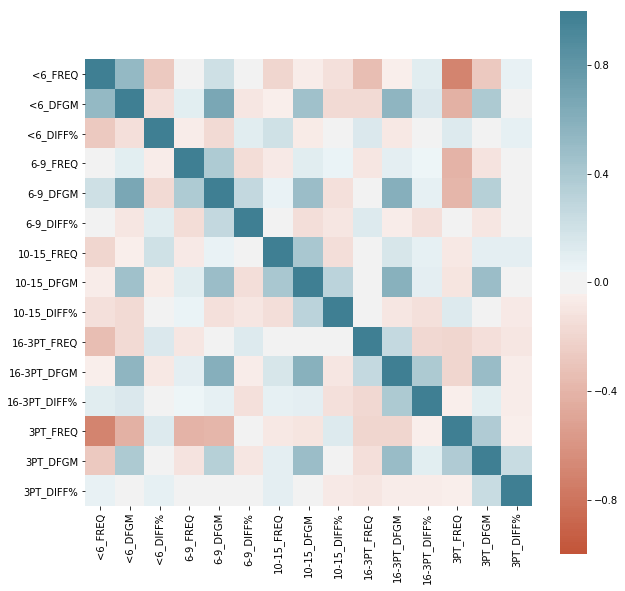

In [39]:
defense = defense[['PLAYER', 'TEAM', 'POSITION', '<6_FREQ', '<6_DFGM', '<6_DIFF%', '6-9_FREQ', '6-9_DFGM', '6-9_DIFF%', '10-15_FREQ', '10-15_DFGM', '10-15_DIFF%',
                   '16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%', '3PT_FREQ', '3PT_DFGM', '3PT_DIFF%']].copy()
defense.fillna(0, inplace = True)
defense.replace(-np.inf, 0, inplace = True)
HeatMap(defense)

In [40]:
defense.head()

,PLAYER,TEAM,POSITION,<6_FREQ,<6_DFGM,<6_DIFF%,6-9_FREQ,6-9_DFGM,6-9_DIFF%,10-15_FREQ,10-15_DFGM,10-15_DIFF%,16-3PT_FREQ,16-3PT_DFGM,16-3PT_DIFF%,3PT_FREQ,3PT_DFGM,3PT_DIFF%
0,Joel Embiid,PHI,F-C,49.5,4.8,-9.4,10.2,0.6,-20.6,7.5,0.7,-1.4,12.4,0.9,1.7,20.5,1.4,2.9
1,Rudy Gobert,UTA,C,48.8,4.5,-11.0,14.6,1.0,-14.3,9.6,0.6,-17.4,12.4,1.0,7.3,14.7,0.9,1.5
2,Clint Capela,HOU,C,43.4,4.5,-4.2,13.0,1.0,-8.7,7.3,0.6,-1.4,11.9,0.8,-0.3,24.2,1.4,-1.7
3,Steven Adams,OKC,C,44.3,4.2,-4.7,12.2,0.9,-7.7,7.9,0.6,-4.7,12.2,0.8,1.4,23.0,1.3,-1.3
4,Brook Lopez,MIL,C,39.9,3.3,-11.5,13.6,0.9,-11.4,9.9,0.7,-9.2,11.7,0.9,9.5,24.6,1.5,4.4


In [41]:
# Hustle

In [42]:
print(hustle.shape)
hustle.head()

(530, 17)


,PLAYER,TEAM,AGE,GP,MIN,SCREEN ASSISTS,SCREEN ASSISTS PTS,DEFLECTIONS,OFF LOOSE BALLS RECOVERED,DEF LOOSE BALLS RECOVERED,LOOSE BALLS RECOVERED,% LOOSE BALLS RECOVERED OFF,% LOOSE BALLS RECOVERED DEF,CHARGES DRAWN,CONTESTED 2PT SHOTS,CONTESTED 3PT SHOTS,CONTESTED SHOTS
1,Aaron Gordon,ORL,23.0,78.0,33.8,0.9,2.1,1.3,0.6,0.6,1.2,50.5,49.5,0.01,4.4,2.1,6.5
2,Aaron Holiday,IND,22.0,50.0,12.9,0.0,0.0,0.7,0.2,0.2,0.3,47.1,52.9,0.00,1.5,1.0,2.5
3,Abdel Nader,OKC,25.0,61.0,11.4,0.0,0.1,0.5,0.2,0.2,0.4,52.0,48.0,0.02,2.1,1.6,3.8
4,Al Horford,BOS,33.0,68.0,29.0,3.3,7.7,1.4,0.3,0.6,0.8,31.6,68.4,0.00,8.8,2.9,11.7
5,Al-Farouq Aminu,POR,28.0,81.0,28.3,1.0,2.3,1.9,0.5,0.5,1.0,53.8,46.3,0.02,4.4,3.0,7.4


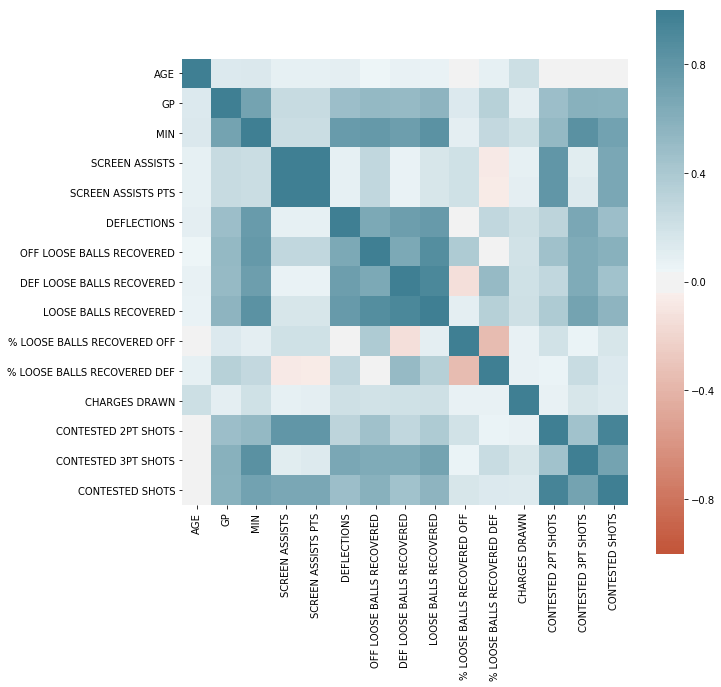

In [43]:
HeatMap(hustle)

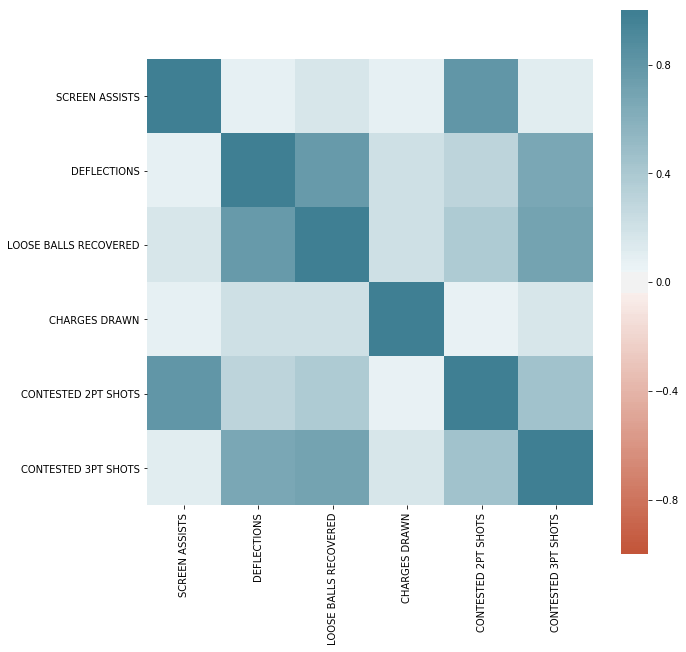

In [44]:
hustle.drop(['AGE', 'GP', 'MIN', 'SCREEN ASSISTS PTS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED', '% LOOSE BALLS RECOVERED OFF', '% LOOSE BALLS RECOVERED DEF', 'CONTESTED SHOTS'], axis = 1, inplace = True)
HeatMap(hustle)

In [45]:
print(shooting.shape)
shooting.head()

(530, 21)


,PLAYER,TEAM,AGE,FGM_<5,FGA_<5,FG%_<5,FGM_5-9,FGA_5-9,FG%_5-9,FGM_10-14,FGA_10-14,FG%_10-14,FGM_15-19,FGA_15-19,FG%_15-19,FGM_20-24,FGA_20-24,FG%_20-24,FGM_25-29,FGA_25-29,FG%_25-29
1,Aaron Gordon,ORL,23,3.2,5.2,60.9,0.3,1.0,34.7,0.5,1.3,38.4,0.4,1.3,29.6,0.8,2.0,40.4,0.9,2.7,32.7
2,Aaron Holiday,IND,22,0.6,1.1,58.2,0.2,0.5,31.8,0.1,0.4,31.3,0.3,0.7,41.2,0.3,0.7,40.6,0.7,2.0,34.7
3,Abdel Nader,OKC,25,0.8,1.4,56.5,0.2,0.4,39.1,0.0,0.1,0.0,0.0,0.0,0.0,0.3,0.9,36.4,0.3,0.8,30.4
4,Al Horford,BOS,33,2.3,3.4,68.8,0.8,1.4,55.3,0.5,1.0,49.3,0.8,1.4,55.8,0.4,1.3,35.3,0.9,2.1,39.7
5,Al-Farouq Aminu,POR,28,1.7,2.9,59.6,0.2,0.4,37.1,0.0,0.2,13.3,0.0,0.2,22.2,0.7,2.0,36.6,0.5,1.6,30.2


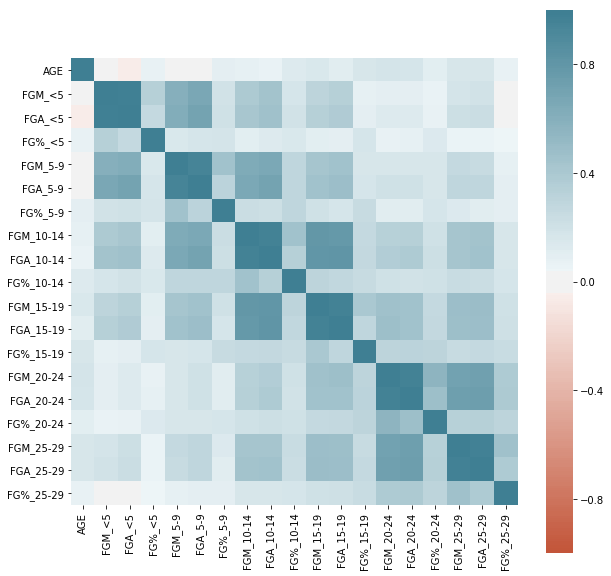

In [46]:
HeatMap(shooting)

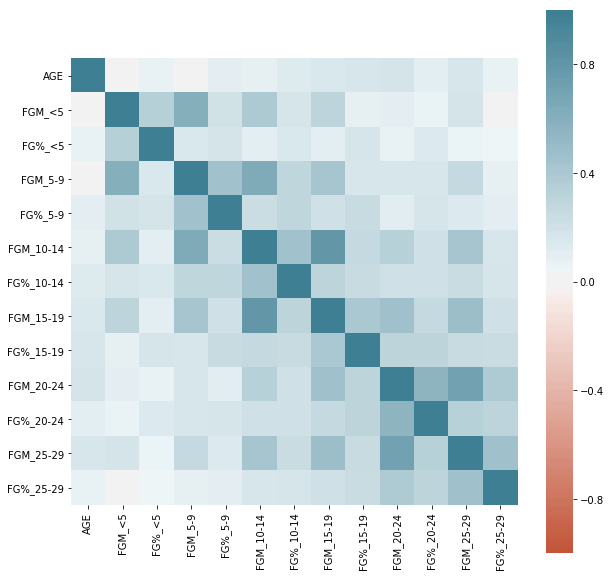

In [47]:
shooting.drop(['FGA_<5', 'FGA_5-9', 'FGA_10-14', 'FGA_15-19', 'FGA_20-24', 'FGA_25-29'], axis = 1, inplace = True)
HeatMap(shooting)

In [48]:
X = shooting.drop(['PLAYER', 'TEAM', 'AGE'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)

FGM_<5       4.521344
FG%_<5       9.244449
FGM_5-9      5.468873
FG%_5-9      5.646867
FGM_10-14    7.548216
FG%_10-14    4.979533
FGM_15-19    5.629564
FG%_15-19    4.566864
FGM_20-24    6.778558
FG%_20-24    7.052459
FGM_25-29    5.025556
FG%_25-29    4.982903
dtype: float64

In [49]:
shooting.head()

,PLAYER,TEAM,AGE,FGM_<5,FG%_<5,FGM_5-9,FG%_5-9,FGM_10-14,FG%_10-14,FGM_15-19,FG%_15-19,FGM_20-24,FG%_20-24,FGM_25-29,FG%_25-29
1,Aaron Gordon,ORL,23,3.2,60.9,0.3,34.7,0.5,38.4,0.4,29.6,0.8,40.4,0.9,32.7
2,Aaron Holiday,IND,22,0.6,58.2,0.2,31.8,0.1,31.3,0.3,41.2,0.3,40.6,0.7,34.7
3,Abdel Nader,OKC,25,0.8,56.5,0.2,39.1,0.0,0.0,0.0,0.0,0.3,36.4,0.3,30.4
4,Al Horford,BOS,33,2.3,68.8,0.8,55.3,0.5,49.3,0.8,55.8,0.4,35.3,0.9,39.7
5,Al-Farouq Aminu,POR,28,1.7,59.6,0.2,37.1,0.0,13.3,0.0,22.2,0.7,36.6,0.5,30.2


In [50]:
# Play Type

In [51]:
print(isolation.shape)
isolation.head()

(287, 17)


,PLAYER,TEAM,GP,ISOLATION_POSS,ISOLATION_FREQ,ISOLATION_PPP,ISOLATION_PTS,ISOLATION_FGM,ISOLATION_FGA,ISOLATION_FG%,ISOLATION_EFG%,ISOLATION_FT_FREQ,ISOLATION_TOV_FREQ,ISOLATION_SF_FREQ,ISOLATION_AND ONE_FREQ,ISOLATION_SCORE_FREQ,ISOLATION_PERCENTILE
1,Aaron Gordon,ORL,78.0,1.0,0.060,0.79,0.8,0.5,0.8,0.365,0.389,0.114,0.127,0.1,0.038,0.367,36.0
2,Aaron Holiday,IND,50.0,0.3,0.040,0.85,0.2,0.1,0.2,0.417,0.458,0,0,0.08,0,0.385,51.4
3,Abdel Nader,OKC,60.0,0.2,0.049,1.33,0.3,0.0,0.2,0.778,0.833,0.083,0.167,0.08,0,0.667,98.3
4,Al Horford,BOS,68.0,0.4,0.028,1.21,0.4,0.1,0.4,0.583,0.583,0.042,0,0.04,0.042,0.583,96.5
5,Al-Farouq Aminu,POR,81.0,0.3,0.034,1.04,0.3,0.1,0.2,0.474,0.474,0.2,0.12,0.2,0.08,0.48,82.7


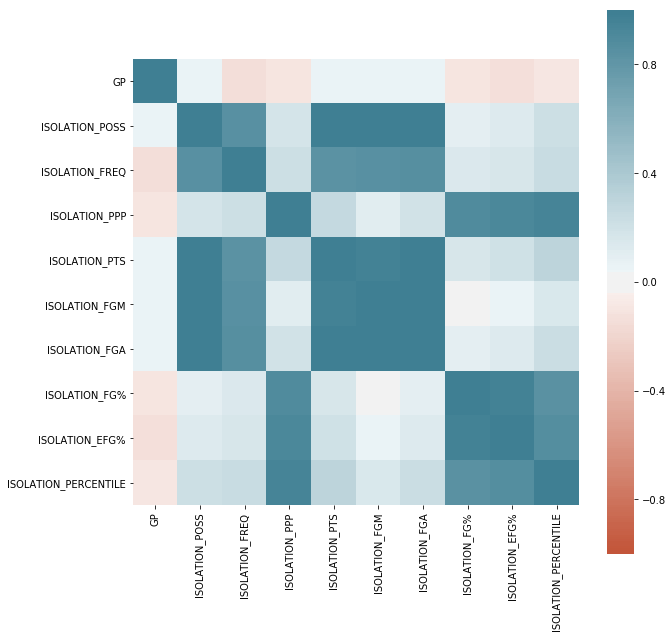

In [52]:
HeatMap(isolation)

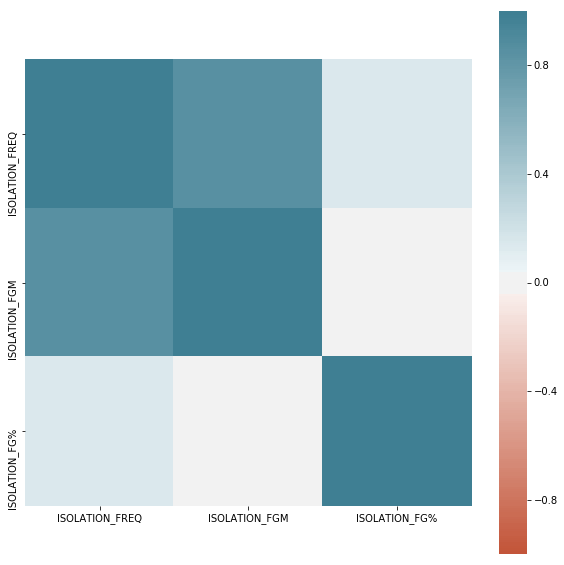

In [53]:
isolation = isolation[['PLAYER', 'TEAM', 'ISOLATION_FREQ', 'ISOLATION_FGM', 'ISOLATION_FG%']]
HeatMap(isolation)

In [54]:
print(pnr_handler.shape)
pnr_handler.head()

(308, 17)


,PLAYER,TEAM,GP,PNR_HANDLER_POSS,PNR_HANDLER_FREQ,PNR_HANDLER_PPP,PNR_HANDLER_PTS,PNR_HANDLER_FGM,PNR_HANDLER_FGA,PNR_HANDLER_FG%,PNR_HANDLER_EFG%,PNR_HANDLER_FT_FREQ,PNR_HANDLER_TOV_FREQ,PNR_HANDLER_SF_FREQ,PNR_HANDLER_AND ONE_FREQ,PNR_HANDLER_SCORE_FREQ,PNR_HANDLER_PERCENTILE
1,Kemba Walker,CHA,82.0,11.8,0.468,1.01,11.9,5.3,9.5,0.446,0.515,0.105,0.112,0.094,0.02,0.441,90.9
2,Damian Lillard,POR,80.0,10.9,0.447,1.08,11.7,4.5,8.7,0.478,0.553,0.113,0.107,0.076,0.024,0.471,94.8
3,D'Angelo Russell,BKN,81.0,11.4,0.499,0.89,10.1,5.2,9.3,0.440,0.496,0.052,0.136,0.041,0.007,0.403,67.2
4,Donovan Mitchell,UTA,77.0,11.1,0.445,0.95,10.5,5.0,9.0,0.450,0.498,0.098,0.114,0.082,0.022,0.436,78.7
5,Lou Williams,LAC,75.0,11.1,0.546,0.96,10.6,4.5,8.0,0.442,0.472,0.17,0.139,0.133,0.035,0.454,80.2


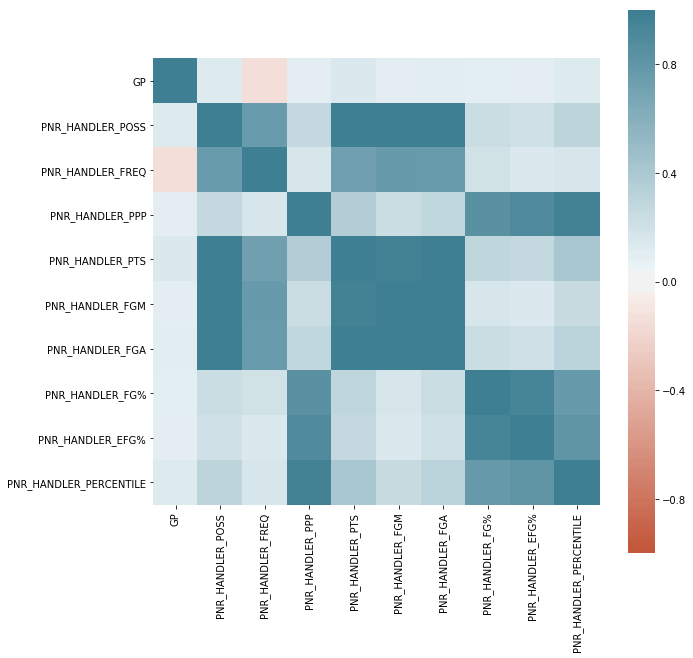

In [55]:
HeatMap(pnr_handler)

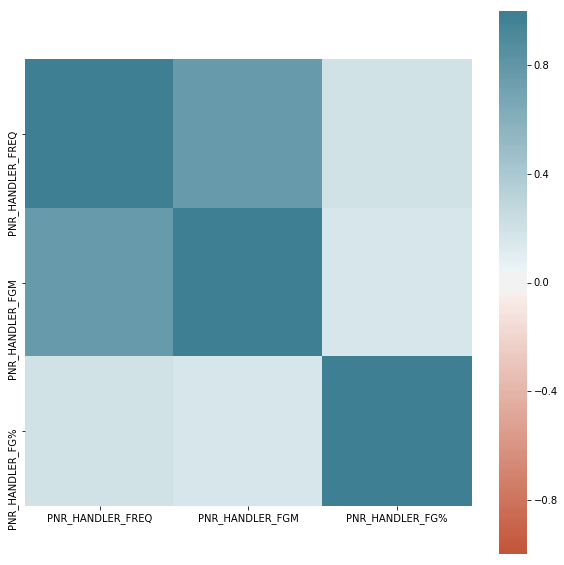

In [56]:
pnr_handler = pnr_handler[['PLAYER', 'TEAM', 'PNR_HANDLER_FREQ', 'PNR_HANDLER_FGM', 'PNR_HANDLER_FG%']]
HeatMap(pnr_handler)

In [57]:
print(pnr_roll.shape)
pnr_roll.head()

(201, 17)


,PLAYER,TEAM,GP,PNR_ROLL_POSS,PNR_ROLL_FREQ,PNR_ROLL_PPP,PNR_ROLL_PTS,PNR_ROLL_FGM,PNR_ROLL_FGA,PNR_ROLL_FG%,PNR_ROLL_EFG%,PNR_ROLL_FT_FREQ,PNR_ROLL_TOV_FREQ,PNR_ROLL_SF_FREQ,PNR_ROLL_AND ONE_FREQ,PNR_ROLL_SCORE_FREQ,PNR_ROLL_PERCENTILE
1,Nikola Vucevic,ORL,80.0,4.1,0.205,1.13,4.7,1.6,3.6,0.542,0.585,0.069,0.073,0.069,0.012,0.529,61.1
2,Rudy Gobert,UTA,81.0,3.4,0.253,1.35,4.5,0.7,2.4,0.709,0.709,0.283,0.063,0.268,0.07,0.691,93.1
3,Montrezl Harrell,LAC,82.0,3.4,0.233,1.31,4.4,0.8,2.7,0.689,0.692,0.205,0.083,0.201,0.076,0.662,87.5
4,Myles Turner,IND,74.0,4.7,0.359,1.03,4.9,2.1,4.1,0.482,0.526,0.095,0.063,0.092,0.026,0.481,41.7
5,Serge Ibaka,TOR,74.0,4.3,0.297,1.10,4.7,1.7,3.8,0.546,0.559,0.085,0.044,0.082,0.013,0.552,56.5


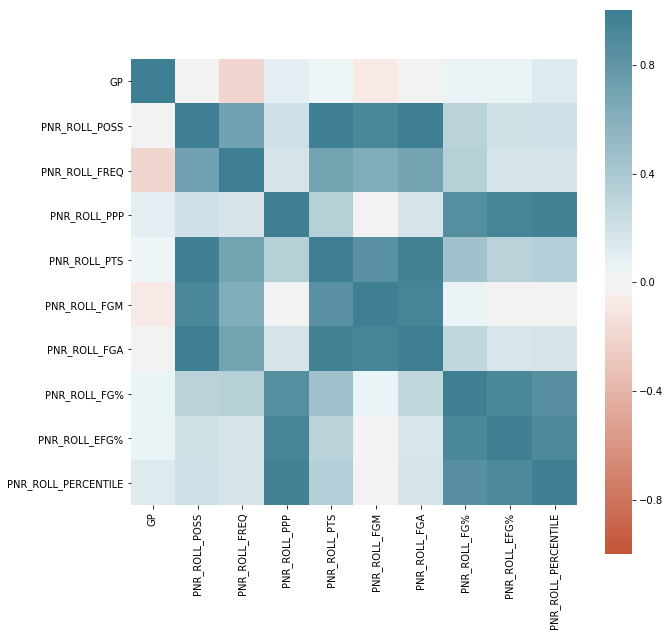

In [58]:
HeatMap(pnr_roll)

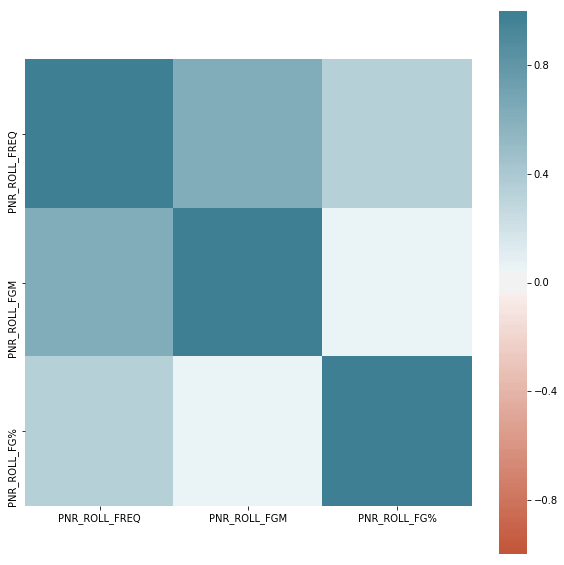

In [59]:
pnr_roll = pnr_roll[['PLAYER', 'TEAM', 'PNR_ROLL_FREQ', 'PNR_ROLL_FGM', 'PNR_ROLL_FG%']]
HeatMap(pnr_roll)

In [60]:
print(transition.shape)
transition.head()

(458, 17)


,PLAYER,TEAM,GP,TRANSITION_POSS,TRANSITION_FREQ,TRANSITION_PPP,TRANSITION_PTS,TRANSITION_FGM,TRANSITION_FGA,TRANSITION_FG%,TRANSITION_EFG%,TRANSITION_FT_FREQ,TRANSITION_TOV_FREQ,TRANSITION_SF_FREQ,TRANSITION_AND ONE_FREQ,TRANSITION_SCORE_FREQ,TRANSITION_PERCENTILE
1,Giannis Antetokounmpo,MIL,72.0,6.4,0.256,1.14,7.3,1.4,3.9,0.640,0.649,0.286,0.169,0.266,0.063,0.587,55.8
2,Buddy Hield,SAC,82.0,5.0,0.261,1.21,6.0,2.1,4.4,0.510,0.620,0.075,0.073,0.073,0.022,0.499,70.2
3,Bradley Beal,WAS,82.0,5.1,0.209,1.14,5.8,2.1,4.1,0.488,0.590,0.117,0.093,0.103,0.017,0.492,55.6
4,Paul George,OKC,76.0,5.4,0.206,1.11,6.0,2.3,4.4,0.482,0.567,0.121,0.097,0.097,0.029,0.478,49.6
5,Kevin Durant,GSW,78.0,4.9,0.211,1.17,5.8,1.4,3.5,0.585,0.629,0.181,0.15,0.168,0.039,0.547,63.4


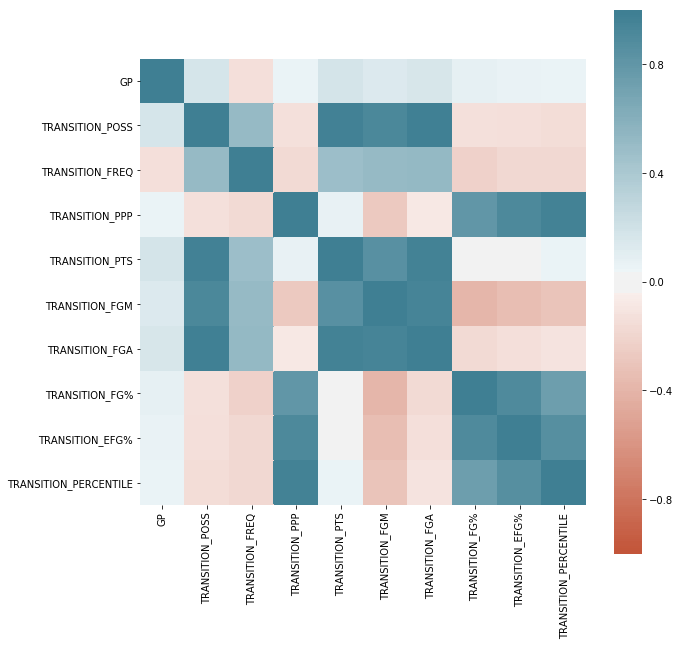

In [61]:
HeatMap(transition)

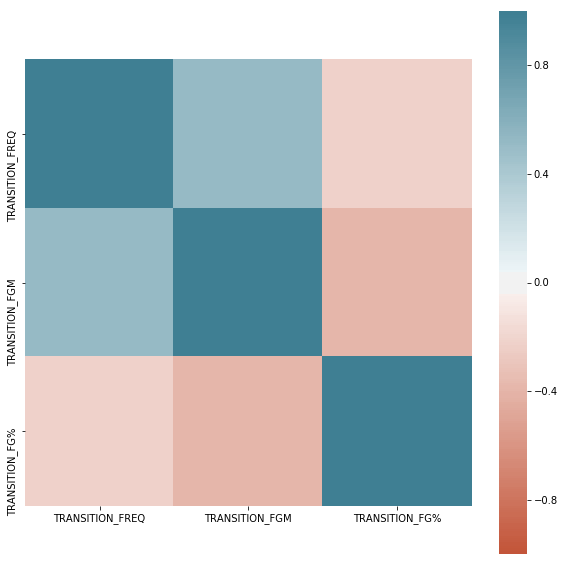

In [62]:
transition = transition[['PLAYER', 'TEAM', 'TRANSITION_FREQ', 'TRANSITION_FGM', 'TRANSITION_FG%']]
HeatMap(transition)

In [63]:
print(post_up.shape)
post_up.head()

(195, 17)


,PLAYER,TEAM,GP,POST_UP_POSS,POST_UP_FREQ,POST_UP_PPP,POST_UP_PTS,POST_UP_FGM,POST_UP_FGA,POST_UP_FG%,POST_UP_EFG%,POST_UP_FT_FREQ,POST_UP_TOV_FREQ,POST_UP_SF_FREQ,POST_UP_AND ONE_FREQ,POST_UP_SCORE_FREQ,POST_UP_PERCENTILE
1,LaMarcus Aldridge,SAS,81.0,8.6,0.427,1.04,9.0,3.4,7.0,0.506,0.506,0.157,0.073,0.133,0.037,0.524,76.5
2,Joel Embiid,PHI,64.0,8.1,0.299,1.05,8.5,2.6,5.2,0.501,0.501,0.266,0.131,0.207,0.044,0.537,78.4
3,Karl-Anthony Towns,MIN,77.0,6.8,0.302,1.02,7.0,2.3,5.0,0.541,0.541,0.154,0.152,0.127,0.038,0.51,73.5
4,Blake Griffin,DET,75.0,6.4,0.264,0.92,5.9,2.3,4.4,0.486,0.486,0.199,0.149,0.159,0.037,0.482,49.5
5,Nikola Jokic,DEN,80.0,5.1,0.254,1.03,5.2,1.9,3.9,0.524,0.524,0.152,0.113,0.12,0.029,0.521,75.5


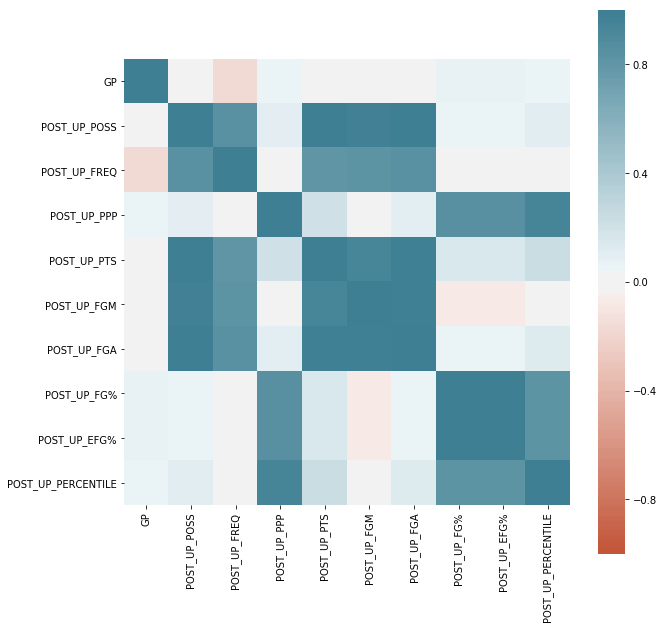

In [64]:
HeatMap(post_up)

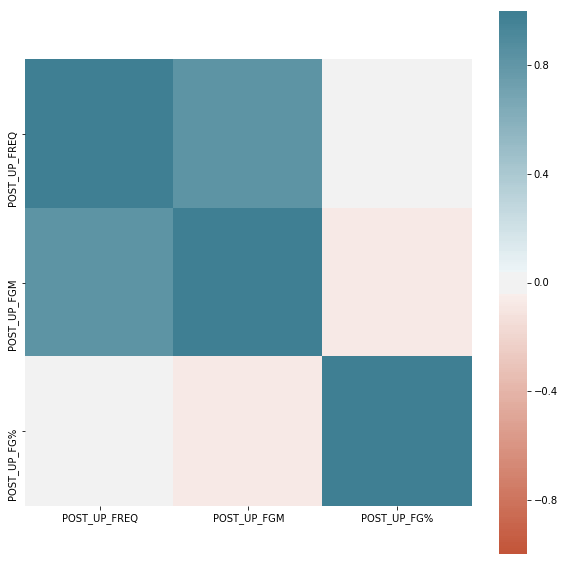

In [65]:
post_up = post_up[['PLAYER', 'TEAM', 'POST_UP_FREQ', 'POST_UP_FGM', 'POST_UP_FG%']]
HeatMap(post_up)

In [66]:
print(spot_up.shape)
spot_up.head()

(458, 17)


,PLAYER,TEAM,GP,SPOT_UP_POSS,SPOT_UP_FREQ,SPOT_UP_PPP,SPOT_UP_PTS,SPOT_UP_FGM,SPOT_UP_FGA,SPOT_UP_FG%,SPOT_UP_EFG%,SPOT_UP_FT_FREQ,SPOT_UP_TOV_FREQ,SPOT_UP_SF_FREQ,SPOT_UP_AND ONE_FREQ,SPOT_UP_SCORE_FREQ,SPOT_UP_PERCENTILE
1,Jae Crowder,UTA,80.0,5.3,0.439,1.07,5.7,2.9,4.8,0.394,0.533,0.083,0.045,0.075,0.026,0.41,71.1
2,Eric Gordon,HOU,68.0,5.2,0.324,1.14,5.9,2.8,4.9,0.422,0.584,0.034,0.034,0.031,0.008,0.419,85.1
3,Brook Lopez,MIL,81.0,4.4,0.391,1.11,5.0,2.4,4.1,0.409,0.568,0.047,0.042,0.044,0.006,0.417,79.8
4,Bryn Forbes,SAS,82.0,4.0,0.360,1.22,4.8,2.0,3.7,0.458,0.606,0.052,0.04,0.049,0.022,0.457,92.5
5,Jerami Grant,OKC,79.0,4.3,0.354,1.05,4.5,2.3,3.9,0.407,0.549,0.061,0.056,0.056,0.009,0.406,67.1


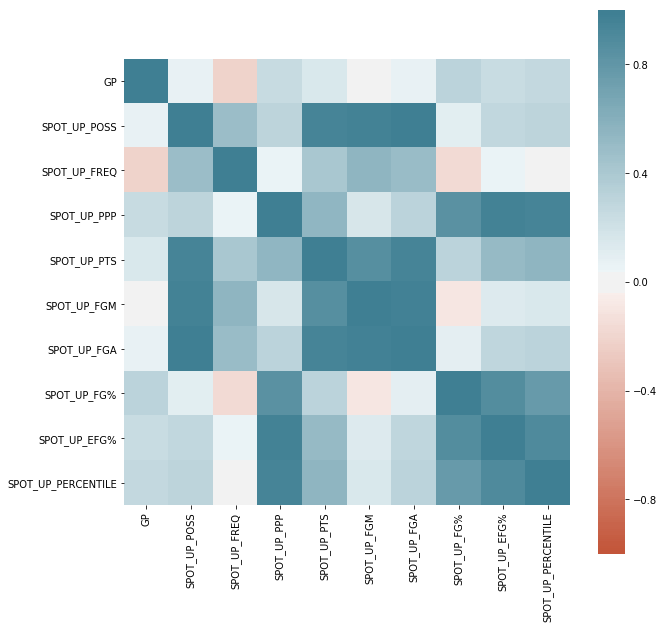

In [67]:
HeatMap(spot_up)

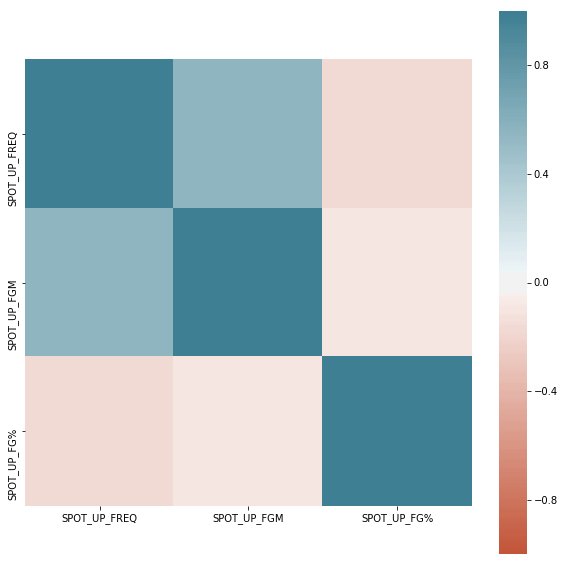

In [68]:
spot_up = spot_up[['PLAYER', 'TEAM', 'SPOT_UP_FREQ', 'SPOT_UP_FGM', 'SPOT_UP_FG%']]
HeatMap(spot_up)

In [69]:
print(handoff.shape)
handoff.head()

(280, 17)


,PLAYER,TEAM,GP,HANDOFF_POSS,HANDOFF_FREQ,HANDOFF_PPP,HANDOFF_PTS,HANDOFF_FGM,HANDOFF_FGA,HANDOFF_FG%,HANDOFF_EFG%,HANDOFF_FT_FREQ,HANDOFF_TOV_FREQ,HANDOFF_SF_FREQ,HANDOFF_AND ONE_FREQ,HANDOFF_SCORE_FREQ,HANDOFF_PERCENTILE
1,JJ Redick,PHI,76.0,5.2,0.324,1.10,5.7,2.5,4.5,0.449,0.564,0.063,0.076,0.056,0.013,0.443,85.0
2,Jamal Murray,DEN,75.0,2.9,0.154,0.97,2.8,1.3,2.5,0.451,0.503,0.069,0.092,0.055,0.005,0.445,62.2
3,Gary Harris,DEN,57.0,3.6,0.266,0.98,3.5,1.7,3.1,0.443,0.494,0.103,0.054,0.093,0.02,0.466,64.6
4,Damian Lillard,POR,80.0,2.6,0.109,0.93,2.5,1.3,2.0,0.384,0.482,0.081,0.147,0.062,0.005,0.374,53.1
5,Josh Richardson,MIA,73.0,2.4,0.141,1.01,2.4,1.2,2.0,0.396,0.497,0.08,0.075,0.057,0.011,0.408,70.6


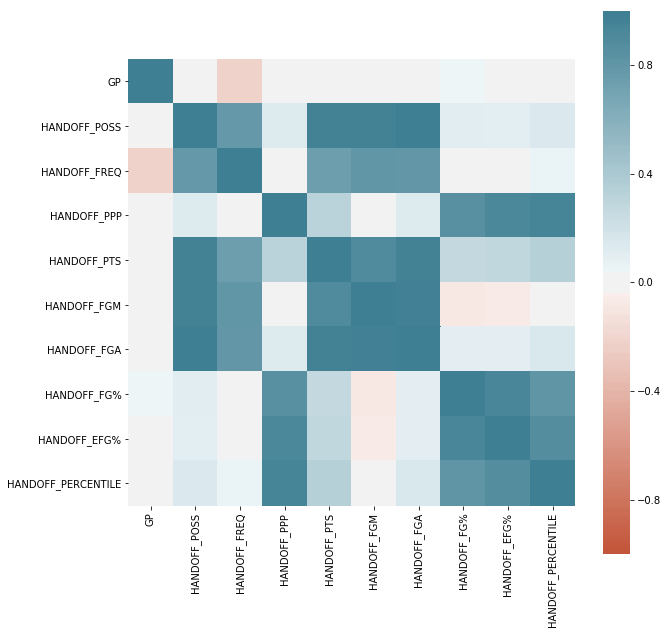

In [70]:
HeatMap(handoff)

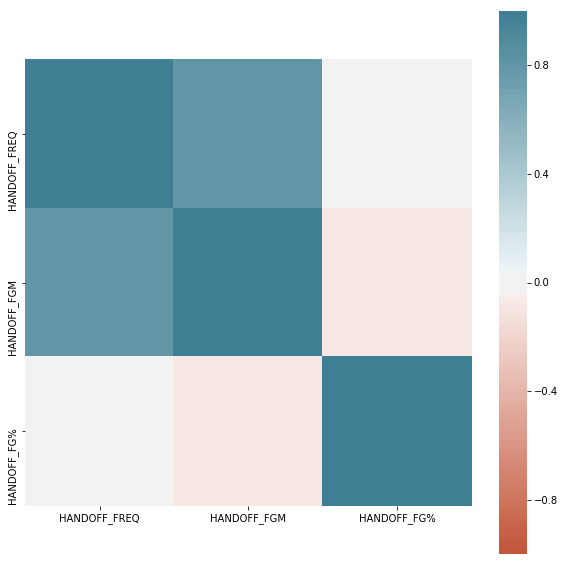

In [71]:
handoff = handoff[['PLAYER', 'TEAM', 'HANDOFF_FREQ', 'HANDOFF_FGM', 'HANDOFF_FG%']]
HeatMap(handoff)

In [72]:
print(cut.shape)
cut.head()

(360, 17)


,PLAYER,TEAM,GP,CUT_POSS,CUT_FREQ,CUT_PPP,CUT_PTS,CUT_FGM,CUT_FGA,CUT_FG%,CUT_EFG%,CUT_FT_FREQ,CUT_TOV_FREQ,CUT_SF_FREQ,CUT_AND ONE_FREQ,CUT_SCORE_FREQ,CUT_PERCENTILE
1,Rudy Gobert,UTA,81.0,3.5,0.264,1.29,4.5,0.8,2.6,0.692,0.692,0.229,0.06,0.232,0.046,0.683,52.3
2,Clint Capela,HOU,67.0,4.0,0.283,1.35,5.3,1.1,3.5,0.695,0.695,0.117,0.019,0.117,0.03,0.687,64.6
3,JaVale McGee,LAL,75.0,2.9,0.265,1.38,4.0,0.7,2.5,0.714,0.714,0.13,0.051,0.125,0.037,0.694,72.7
4,Montrezl Harrell,LAC,82.0,2.5,0.172,1.42,3.5,0.6,2.0,0.719,0.719,0.234,0.049,0.234,0.098,0.698,76.7
5,Ben Simmons,PHI,79.0,2.7,0.151,1.30,3.5,0.7,2.3,0.689,0.689,0.126,0.065,0.121,0.028,0.665,53.9


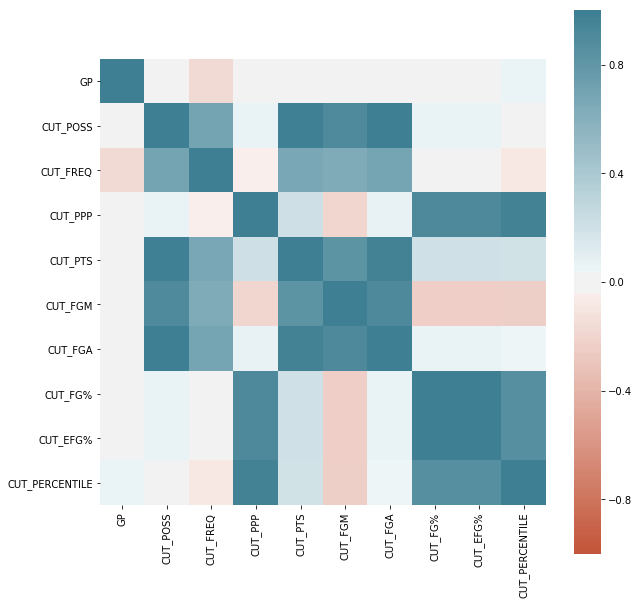

In [73]:
HeatMap(cut)

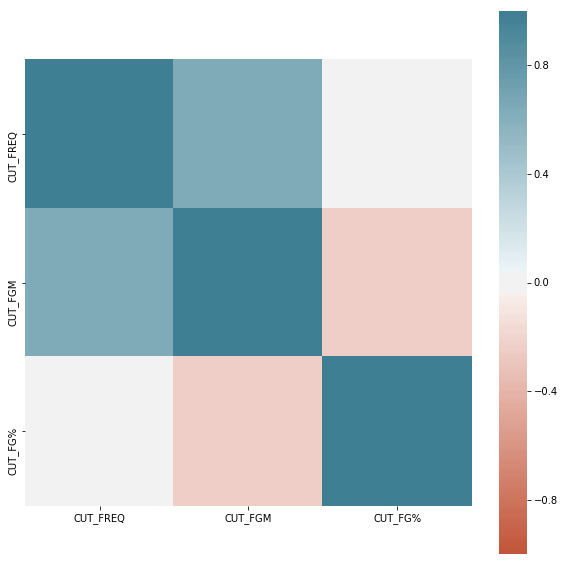

In [74]:
cut = cut[['PLAYER', 'TEAM', 'CUT_FREQ', 'CUT_FGM', 'CUT_FG%']]
HeatMap(cut)

In [75]:
print(off_screen.shape)
off_screen.head()

(229, 17)


,PLAYER,TEAM,GP,OFF_SCREEN_POSS,OFF_SCREEN_FREQ,OFF_SCREEN_PPP,OFF_SCREEN_PTS,OFF_SCREEN_FGM,OFF_SCREEN_FGA,OFF_SCREEN_FG%,OFF_SCREEN_EFG%,OFF_SCREEN_FT_FREQ,OFF_SCREEN_TOV_FREQ,OFF_SCREEN_SF_FREQ,OFF_SCREEN_AND ONE_FREQ,OFF_SCREEN_SCORE_FREQ,OFF_SCREEN_PERCENTILE
1,Klay Thompson,GSW,78.0,6.9,0.342,1.05,7.3,3.6,6.4,0.438,0.544,0.03,0.052,0.03,0.007,0.427,72.0
2,Stephen Curry,GSW,69.0,4.8,0.201,1.29,6.1,2.3,4.4,0.467,0.641,0.052,0.043,0.049,0.012,0.468,97.0
3,Joe Harris,BKN,76.0,3.7,0.301,1.29,4.7,1.4,3.1,0.555,0.691,0.072,0.094,0.061,0.022,0.522,97.4
4,Bojan Bogdanovic,IND,81.0,3.5,0.218,1.08,3.8,1.6,2.9,0.464,0.536,0.123,0.077,0.116,0.025,0.481,77.2
5,Terrence Ross,ORL,81.0,3.7,0.258,0.97,3.6,2.0,3.4,0.405,0.482,0.047,0.05,0.04,0.01,0.407,53.9


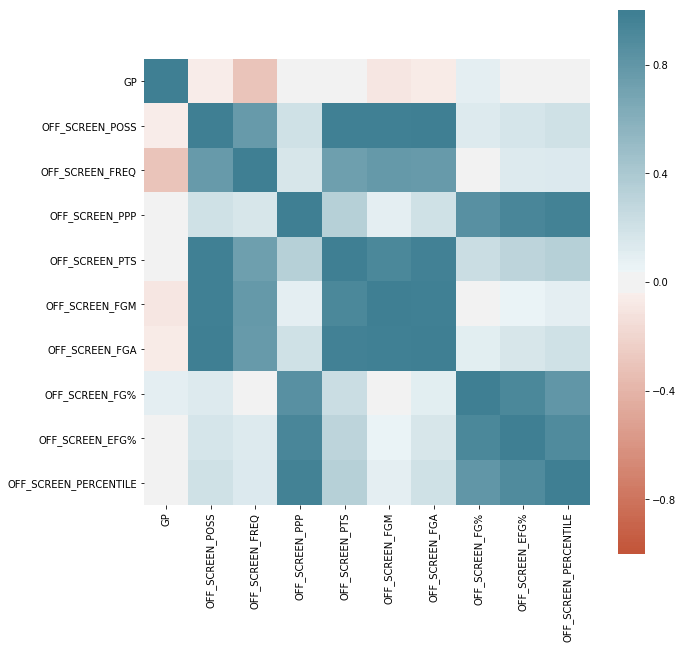

In [76]:
HeatMap(off_screen)

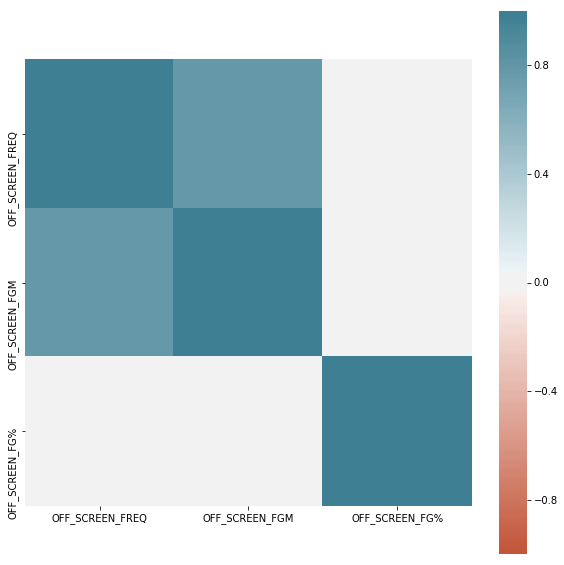

In [77]:
off_screen = off_screen[['PLAYER', 'TEAM', 'OFF_SCREEN_FREQ', 'OFF_SCREEN_FGM', 'OFF_SCREEN_FG%']]
HeatMap(off_screen)

In [78]:
print(putback.shape)
putback.head()

(277, 17)


,PLAYER,TEAM,GP,PUTBACK_POSS,PUTBACK_FREQ,PUTBACK_PPP,PUTBACK_PTS,PUTBACK_FGM,PUTBACK_FGA,PUTBACK_FG%,PUTBACK_EFG%,PUTBACK_FT_FREQ,PUTBACK_TOV_FREQ,PUTBACK_SF_FREQ,PUTBACK_AND ONE_FREQ,PUTBACK_SCORE_FREQ,PUTBACK_PERCENTILE
1,Hassan Whiteside,POR,61.0,3.3,0.231,1.29,4.3,1.0,3.0,0.661,0.661,0.103,0.039,0.103,0.025,0.647,82.6
2,Andre Drummond,DET,49.0,3.8,0.192,1.05,4.0,1.4,3.1,0.552,0.552,0.124,0.075,0.113,0.027,0.543,44.8
3,Mitchell Robinson,NYK,61.0,2.6,0.352,1.22,3.1,0.8,2.1,0.638,0.638,0.217,0.019,0.217,0.051,0.637,73.0
4,Rudy Gobert,UTA,62.0,2.7,0.206,1.15,3.1,0.8,2.1,0.631,0.631,0.158,0.085,0.152,0.03,0.6,63.0
5,Jonas Valanciunas,MEM,62.0,2.5,0.185,1.21,3.0,0.8,2.2,0.630,0.630,0.083,0.064,0.083,0.013,0.603,72.2


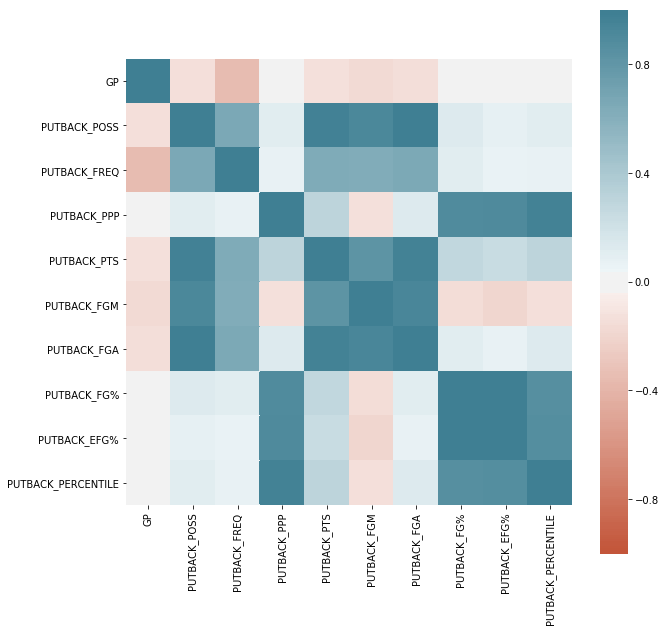

In [79]:
HeatMap(putback)

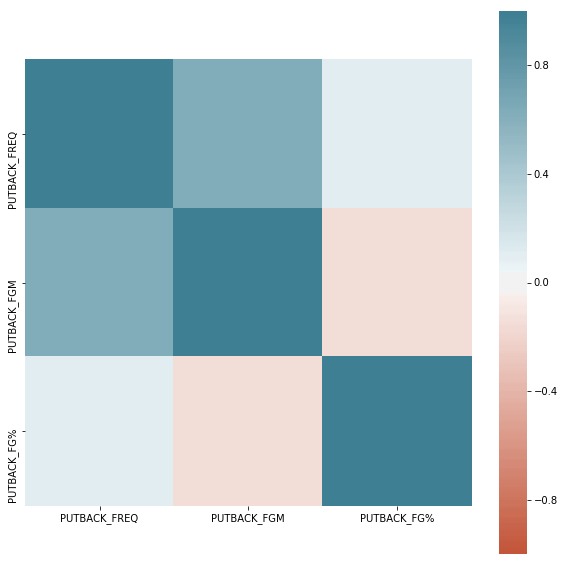

In [80]:
putback = putback[['PLAYER', 'TEAM', 'PUTBACK_FREQ', 'PUTBACK_FGM', 'PUTBACK_FG%']]
HeatMap(putback)

In [81]:
play_type = isolation.merge(pnr_handler, how = 'outer')
play_type = play_type.merge(pnr_roll, how = 'outer')
play_type = play_type.merge(transition, how = 'outer')
play_type = play_type.merge(post_up, how = 'outer')
play_type = play_type.merge(spot_up, how = 'outer')
play_type = play_type.merge(handoff, how = 'outer')
play_type = play_type.merge(cut, how = 'outer')
play_type = play_type.merge(off_screen, how = 'outer')
play_type = play_type.merge(putback, how = 'outer')

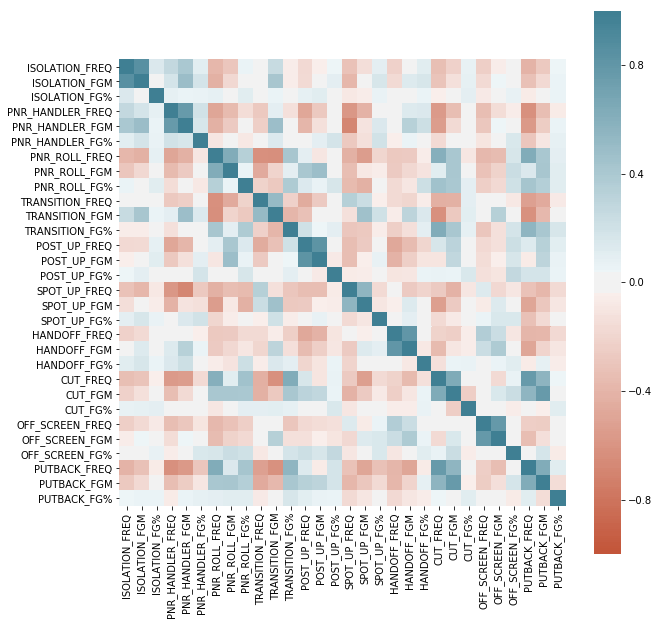

In [82]:
HeatMap(play_type)

In [83]:
# Passing

In [84]:
print(passing.shape)
passing.head()

(530, 15)


,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ
1,Aaron Gordon,ORL,76.0,38.0,38.0,33.8,35.9,32.2,3.7,0.4,6.6,8.7,4.1,10.2,11.3
2,Aaron Holiday,IND,50.0,31.0,19.0,12.9,15.6,20.3,1.7,0.3,3.1,4.0,2.1,11.2,13.6
3,Abdel Nader,OKC,60.0,37.0,23.0,11.4,5.7,6.7,0.3,0.1,0.7,0.8,0.4,5.8,6.7
4,Al Horford,BOS,68.0,41.0,27.0,29.0,42.9,39.2,4.2,0.5,7.5,10.7,4.8,9.7,11.2
5,Al-Farouq Aminu,POR,81.0,52.0,29.0,28.3,25.9,16.2,1.3,0.2,2.2,3.1,1.5,5.0,5.9


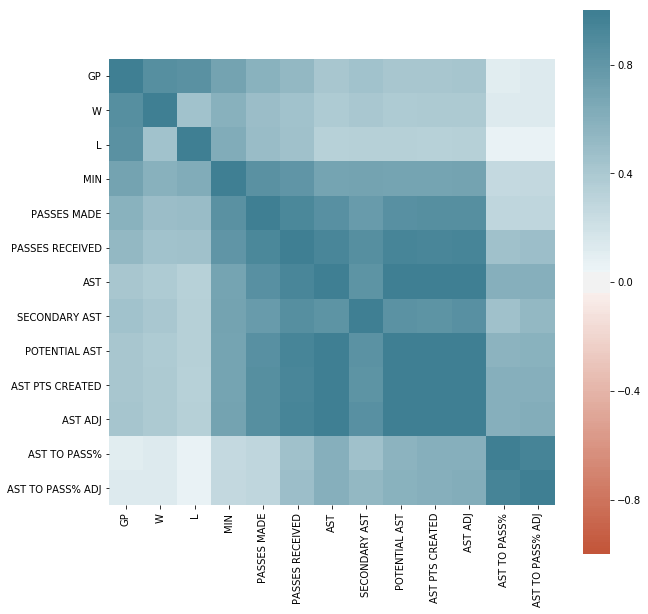

In [85]:
HeatMap(passing)

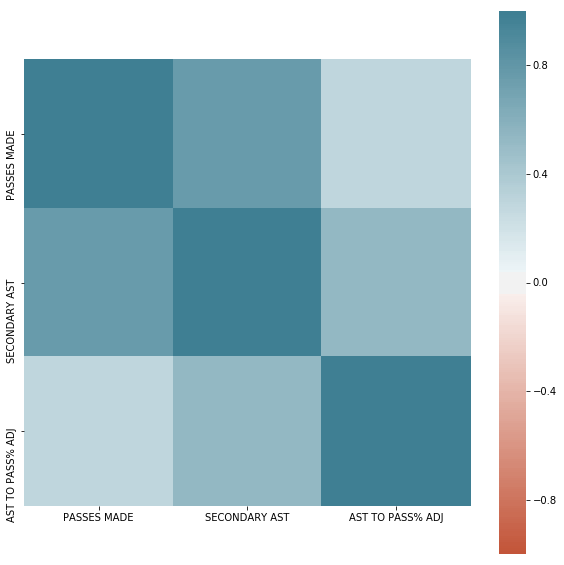

In [86]:
passing.drop(['GP', 'W', 'L', 'MIN', 'AST ADJ', 'AST', 'POTENTIAL AST', 'AST TO PASS%', 'PASSES RECEIVED', 'AST PTS CREATED'], axis = 1, inplace = True)
HeatMap(passing)

In [87]:
X = passing.drop(['PLAYER', 'TEAM'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)

PASSES MADE         5.853705
SECONDARY AST       5.269540
AST TO PASS% ADJ    3.517465
dtype: float64

In [88]:
# Merge

In [89]:
general.head()

,PLAYER,TEAM,AGE,MIN,PTS,FG%,3P%,OREB,DREB,AST,STL,BLK,+/-
0,James Harden,HOU,29,36.8,36.1,44.2,36.8,0.8,5.8,7.5,2.0,0.7,4.6
1,Paul George,OKC,29,36.9,28.0,43.8,38.6,1.4,6.8,4.1,2.2,0.4,6.4
2,Giannis Antetokounmpo,MIL,24,32.8,27.7,57.8,25.6,2.2,10.3,5.9,1.3,1.5,9.1
3,Joel Embiid,PHI,25,33.7,27.5,48.4,30.0,2.5,11.1,3.7,0.7,1.9,5.8
4,LeBron James,LAL,34,35.2,27.4,51.0,33.9,1.0,7.4,8.3,1.3,0.6,2.1


In [90]:
advanced.head()

,PLAYER,TEAM,AST%,AST/TO,OREB%,DREB%,TO RATIO,TS%,USG%,PIE
1,Bam Adebayo,MIA,14.6,1.52,8.3,22.1,13.6,62.3,15.7,13.3
1,Bradley Beal,WAS,23.3,2.00,2.8,10.4,9.1,58.1,27.7,12.8
1,Bryn Forbes,SAS,10.5,2.19,0.8,9.6,7.5,58.6,17.1,7.7
1,Buddy Hield,SAC,11.7,1.40,3.6,11.0,8.2,58.7,24.3,11.0
1,Collin Sexton,CLE,15.4,1.31,2.1,7.2,10.6,52.0,24.7,7.3


In [91]:
defense.head()

,PLAYER,TEAM,POSITION,<6_FREQ,<6_DFGM,<6_DIFF%,6-9_FREQ,6-9_DFGM,6-9_DIFF%,10-15_FREQ,10-15_DFGM,10-15_DIFF%,16-3PT_FREQ,16-3PT_DFGM,16-3PT_DIFF%,3PT_FREQ,3PT_DFGM,3PT_DIFF%
0,Joel Embiid,PHI,F-C,49.5,4.8,-9.4,10.2,0.6,-20.6,7.5,0.7,-1.4,12.4,0.9,1.7,20.5,1.4,2.9
1,Rudy Gobert,UTA,C,48.8,4.5,-11.0,14.6,1.0,-14.3,9.6,0.6,-17.4,12.4,1.0,7.3,14.7,0.9,1.5
2,Clint Capela,HOU,C,43.4,4.5,-4.2,13.0,1.0,-8.7,7.3,0.6,-1.4,11.9,0.8,-0.3,24.2,1.4,-1.7
3,Steven Adams,OKC,C,44.3,4.2,-4.7,12.2,0.9,-7.7,7.9,0.6,-4.7,12.2,0.8,1.4,23.0,1.3,-1.3
4,Brook Lopez,MIL,C,39.9,3.3,-11.5,13.6,0.9,-11.4,9.9,0.7,-9.2,11.7,0.9,9.5,24.6,1.5,4.4


In [92]:
hustle.head()

,PLAYER,TEAM,SCREEN ASSISTS,DEFLECTIONS,LOOSE BALLS RECOVERED,CHARGES DRAWN,CONTESTED 2PT SHOTS,CONTESTED 3PT SHOTS
1,Aaron Gordon,ORL,0.9,1.3,1.2,0.01,4.4,2.1
2,Aaron Holiday,IND,0.0,0.7,0.3,0.00,1.5,1.0
3,Abdel Nader,OKC,0.0,0.5,0.4,0.02,2.1,1.6
4,Al Horford,BOS,3.3,1.4,0.8,0.00,8.8,2.9
5,Al-Farouq Aminu,POR,1.0,1.9,1.0,0.02,4.4,3.0


In [93]:
shooting.head()

,PLAYER,TEAM,AGE,FGM_<5,FG%_<5,FGM_5-9,FG%_5-9,FGM_10-14,FG%_10-14,FGM_15-19,FG%_15-19,FGM_20-24,FG%_20-24,FGM_25-29,FG%_25-29
1,Aaron Gordon,ORL,23,3.2,60.9,0.3,34.7,0.5,38.4,0.4,29.6,0.8,40.4,0.9,32.7
2,Aaron Holiday,IND,22,0.6,58.2,0.2,31.8,0.1,31.3,0.3,41.2,0.3,40.6,0.7,34.7
3,Abdel Nader,OKC,25,0.8,56.5,0.2,39.1,0.0,0.0,0.0,0.0,0.3,36.4,0.3,30.4
4,Al Horford,BOS,33,2.3,68.8,0.8,55.3,0.5,49.3,0.8,55.8,0.4,35.3,0.9,39.7
5,Al-Farouq Aminu,POR,28,1.7,59.6,0.2,37.1,0.0,13.3,0.0,22.2,0.7,36.6,0.5,30.2


In [94]:
play_type.head()

,PLAYER,TEAM,ISOLATION_FREQ,ISOLATION_FGM,ISOLATION_FG%,PNR_HANDLER_FREQ,PNR_HANDLER_FGM,PNR_HANDLER_FG%,PNR_ROLL_FREQ,PNR_ROLL_FGM,PNR_ROLL_FG%,TRANSITION_FREQ,TRANSITION_FGM,TRANSITION_FG%,POST_UP_FREQ,POST_UP_FGM,POST_UP_FG%,SPOT_UP_FREQ,SPOT_UP_FGM,SPOT_UP_FG%,HANDOFF_FREQ,HANDOFF_FGM,HANDOFF_FG%,CUT_FREQ,CUT_FGM,CUT_FG%,OFF_SCREEN_FREQ,OFF_SCREEN_FGM,OFF_SCREEN_FG%,PUTBACK_FREQ,PUTBACK_FGM,PUTBACK_FG%
0,Aaron Gordon,ORL,0.060,0.5,0.365,0.121,0.9,0.383,0.026,0.3,0.375,0.140,0.8,0.542,0.132,1.0,0.42,0.204,1.8,0.391,0.069,0.5,0.456,0.069,0.3,0.688,0.069,0.7,0.366,0.083,0.5,0.554
1,Aaron Holiday,IND,0.040,0.1,0.417,0.322,1.1,0.367,NaN,NaN,NaN,0.189,0.5,0.444,NaN,NaN,NaN,0.238,0.9,0.394,0.111,0.3,0.414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdel Nader,OKC,0.049,0.0,0.778,0.089,0.2,0.412,NaN,NaN,NaN,0.236,0.4,0.500,NaN,NaN,NaN,0.492,1.2,0.364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Al Horford,BOS,0.028,0.1,0.583,NaN,NaN,NaN,0.316,1.6,0.548,0.085,0.4,0.554,0.165,0.8,0.53,0.176,1.2,0.430,NaN,NaN,NaN,0.090,0.3,0.704,0.019,0.1,0.462,NaN,NaN,NaN
4,Al-Farouq Aminu,POR,0.034,0.1,0.474,0.022,0.1,0.154,0.035,0.1,0.500,0.154,0.5,0.538,NaN,NaN,NaN,0.470,2.4,0.364,0.015,0.1,0.222,0.103,0.2,0.648,0.026,0.2,0.211,NaN,NaN,NaN


In [95]:
passing.head()

,PLAYER,TEAM,PASSES MADE,SECONDARY AST,AST TO PASS% ADJ
1,Aaron Gordon,ORL,35.9,0.4,11.3
2,Aaron Holiday,IND,15.6,0.3,13.6
3,Abdel Nader,OKC,5.7,0.1,6.7
4,Al Horford,BOS,42.9,0.5,11.2
5,Al-Farouq Aminu,POR,25.9,0.2,5.9


In [96]:
data = general.merge(advanced)
data = data.merge(defense, how = 'left')
data = data.merge(hustle)
data = data.merge(shooting.drop('AGE', axis = 1))
data = data.merge(play_type, how = 'left')
data = data.merge(passing)
data.fillna(0, inplace = True)
data.drop(['AGE', 'MIN'], axis = 1, inplace = True)
print(data.shape)
data.head()

(388, 86)


,PLAYER,TEAM,PTS,FG%,3P%,OREB,DREB,AST,STL,BLK,+/-,AST%,AST/TO,OREB%,DREB%,TO RATIO,TS%,USG%,PIE,POSITION,<6_FREQ,<6_DFGM,<6_DIFF%,6-9_FREQ,6-9_DFGM,6-9_DIFF%,10-15_FREQ,10-15_DFGM,10-15_DIFF%,16-3PT_FREQ,16-3PT_DFGM,16-3PT_DIFF%,3PT_FREQ,3PT_DFGM,3PT_DIFF%,SCREEN ASSISTS,DEFLECTIONS,LOOSE BALLS RECOVERED,CHARGES DRAWN,CONTESTED 2PT SHOTS,CONTESTED 3PT SHOTS,FGM_<5,FG%_<5,FGM_5-9,FG%_5-9,FGM_10-14,FG%_10-14,FGM_15-19,FG%_15-19,FGM_20-24,FG%_20-24,FGM_25-29,FG%_25-29,ISOLATION_FREQ,ISOLATION_FGM,ISOLATION_FG%,PNR_HANDLER_FREQ,PNR_HANDLER_FGM,PNR_HANDLER_FG%,PNR_ROLL_FREQ,PNR_ROLL_FGM,PNR_ROLL_FG%,TRANSITION_FREQ,TRANSITION_FGM,TRANSITION_FG%,POST_UP_FREQ,POST_UP_FGM,POST_UP_FG%,SPOT_UP_FREQ,SPOT_UP_FGM,SPOT_UP_FG%,HANDOFF_FREQ,HANDOFF_FGM,HANDOFF_FG%,CUT_FREQ,CUT_FGM,CUT_FG%,OFF_SCREEN_FREQ,OFF_SCREEN_FGM,OFF_SCREEN_FG%,PUTBACK_FREQ,PUTBACK_FGM,PUTBACK_FG%,PASSES MADE,SECONDARY AST,AST TO PASS% ADJ
0,James Harden,HOU,36.1,44.2,36.8,0.8,5.8,7.5,2.0,0.7,4.6,39.4,1.51,2.3,15.7,12.0,61.6,39.6,20.1,G,30.9,2.5,3.9,14.6,0.5,-24.9,8.1,0.5,3.7,9.8,0.4,-3.7,36.8,1.6,-0.9,0.3,3.5,1.5,0.08,4.4,2.4,4.2,56.2,1.2,49.2,0.4,46.5,0.2,36.4,0.9,34.4,3.9,37.7,0.487,7.9,0.401,0.221,2.7,0.477,0.000,0.0,0.000,0.133,1.3,0.534,0.009,0.1,0.647,0.032,0.6,0.449,0.036,0.4,0.478,0.014,0.1,0.682,0.009,0.2,0.316,0.017,0.1,0.591,49.5,0.9,17.8
1,Paul George,OKC,28.0,43.8,38.6,1.4,6.8,4.1,2.2,0.4,6.4,17.3,1.55,3.3,17.3,8.7,58.3,28.5,16.1,F,33.7,2.6,1.0,7.3,0.3,-18.5,6.5,0.3,-5.4,8.1,0.5,12.1,44.0,1.8,-1.7,0.5,3.8,2.1,0.06,4.3,4.2,3.0,59.0,0.5,37.9,0.7,40.7,0.9,39.3,1.7,42.1,2.3,37.2,0.134,1.9,0.368,0.245,2.7,0.449,0.014,0.3,0.241,0.206,2.3,0.482,0.036,0.3,0.556,0.117,1.5,0.465,0.054,0.7,0.404,0.019,0.1,0.720,0.098,1.3,0.419,0.000,0.0,0.000,31.1,0.3,15.0
2,Giannis Antetokounmpo,MIL,27.7,57.8,25.6,2.2,10.3,5.9,1.3,1.5,9.1,29.4,1.58,6.6,27.3,12.0,64.4,31.4,21.8,F,34.1,2.0,-9.9,9.0,0.3,-22.9,5.4,0.3,3.4,9.0,0.4,3.5,42.1,1.5,-1.8,2.0,2.1,1.6,0.01,5.5,4.1,8.1,72.6,0.4,30.7,0.3,41.8,0.4,40.0,0.2,26.8,0.6,25.7,0.155,1.7,0.429,0.076,0.5,0.622,0.050,0.3,0.720,0.256,1.4,0.640,0.120,0.9,0.558,0.114,1.1,0.471,0.018,0.2,0.593,0.080,0.4,0.737,0.023,0.3,0.371,0.064,0.5,0.678,54.3,0.6,12.2
3,Joel Embiid,PHI,27.5,48.4,30.0,2.5,11.1,3.7,0.7,1.9,5.8,18.5,1.04,7.5,29.2,11.6,59.3,32.7,19.6,F-C,49.5,4.8,-9.4,10.2,0.6,-20.6,7.5,0.7,-1.4,12.4,0.9,1.7,20.5,1.4,2.9,3.9,1.2,1.4,0.02,10.4,2.7,5.4,66.0,0.9,41.5,0.8,38.0,0.6,35.7,0.2,28.8,1.1,30.6,0.064,0.8,0.384,0.030,0.3,0.474,0.076,1.0,0.436,0.100,1.0,0.504,0.299,2.6,0.501,0.155,1.9,0.410,0.009,0.1,0.222,0.088,0.6,0.670,0.027,0.5,0.310,0.082,0.6,0.597,58.0,0.4,7.0
4,LeBron James,LAL,27.4,51.0,33.9,1.0,7.4,8.3,1.3,0.6,2.1,37.6,2.30,2.9,19.3,10.2,58.8,31.1,18.8,F,32.5,2.0,-0.2,9.9,0.4,-12.3,5.9,0.3,5.2,9.9,0.2,-17.4,41.8,1.5,-0.6,0.7,1.8,1.5,0.11,3.2,2.5,6.2,69.0,0.3,25.7,0.6,47.9,0.6,34.4,0.9,42.3,1.5,34.1,0.175,2.3,0.412,0.281,3.2,0.454,0.023,0.2,0.667,0.214,1.3,0.649,0.082,0.8,0.532,0.059,0.9,0.388,0.014,0.1,0.632,0.037,0.3,0.708,0.020,0.3,0.296,0.026,0.2,0.730,54.8,0.7,17.2


In [97]:
data.columns

Index(['PLAYER', 'TEAM', 'PTS', 'FG%', '3P%', 'OREB', 'DREB', 'AST', 'STL',
       'BLK', '+/-', 'AST%', 'AST/TO', 'OREB%', 'DREB%', 'TO RATIO', 'TS%',
       'USG%', 'PIE', 'POSITION', '<6_FREQ', '<6_DFGM', '<6_DIFF%', '6-9_FREQ',
       '6-9_DFGM', '6-9_DIFF%', '10-15_FREQ', '10-15_DFGM', '10-15_DIFF%',
       '16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%', '3PT_FREQ', '3PT_DFGM',
       '3PT_DIFF%', 'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'FGM_<5',
       'FG%_<5', 'FGM_5-9', 'FG%_5-9', 'FGM_10-14', 'FG%_10-14', 'FGM_15-19',
       'FG%_15-19', 'FGM_20-24', 'FG%_20-24', 'FGM_25-29', 'FG%_25-29',
       'ISOLATION_FREQ', 'ISOLATION_FGM', 'ISOLATION_FG%', 'PNR_HANDLER_FREQ',
       'PNR_HANDLER_FGM', 'PNR_HANDLER_FG%', 'PNR_ROLL_FREQ', 'PNR_ROLL_FGM',
       'PNR_ROLL_FG%', 'TRANSITION_FREQ', 'TRANSITION_FGM', 'TRANSITION_FG%',
       'POST_UP_FREQ', 'POST_UP_FGM', 'POST_UP_FG%', 'SPOT_UP_FREQ',
    

In [98]:
stats = data[['PLAYER', 'TEAM', 'POSITION', 'PTS', 'FG%', '3P%', 'OREB', 'DREB', 'AST', 'STL', 'BLK', '+/-', 'AST%', 'AST/TO', 'OREB%',
              'DREB%', 'TO RATIO', 'TS%', 'USG%', 'PIE']]

defense = data[['PLAYER', 'TEAM', 'POSITION', '<6_FREQ', '<6_DFGM', '<6_DIFF%', '6-9_FREQ', '6-9_DFGM', '6-9_DIFF%', '10-15_FREQ',
                '10-15_DFGM', '10-15_DIFF%', '16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%', '3PT_FREQ', '3PT_DFGM', '3PT_DIFF%']]

hustle = data[['PLAYER', 'TEAM', 'POSITION', 'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED', 'CHARGES DRAWN', 'CONTESTED 2PT SHOTS',
               'CONTESTED 3PT SHOTS']]

shooting = data[['PLAYER', 'TEAM', 'POSITION', 'FGM_<5', 'FG%_<5', 'FGM_5-9', 'FG%_5-9', 'FGM_10-14', 'FG%_10-14', 'FGM_15-19', 'FG%_15-19',
                 'FGM_20-24', 'FG%_20-24', 'FGM_25-29', 'FG%_25-29']] 

play_type = data[['PLAYER', 'TEAM', 'POSITION', 'ISOLATION_FREQ', 'ISOLATION_FGM', 'ISOLATION_FG%', 'PNR_HANDLER_FREQ', 'PNR_HANDLER_FGM',
                  'PNR_HANDLER_FG%', 'PNR_ROLL_FREQ', 'PNR_ROLL_FGM', 'PNR_ROLL_FG%', 'TRANSITION_FREQ', 'TRANSITION_FGM', 'TRANSITION_FG%',
                  'POST_UP_FREQ', 'POST_UP_FGM', 'POST_UP_FG%', 'SPOT_UP_FREQ', 'SPOT_UP_FGM', 'SPOT_UP_FG%', 'HANDOFF_FREQ', 'HANDOFF_FGM',
                  'HANDOFF_FG%', 'CUT_FREQ', 'CUT_FGM', 'CUT_FG%', 'OFF_SCREEN_FREQ', 'OFF_SCREEN_FGM', 'OFF_SCREEN_FG%',
                  'PUTBACK_FREQ', 'PUTBACK_FGM', 'PUTBACK_FG%']]

passing = data[['PLAYER', 'TEAM', 'POSITION', 'PASSES MADE', 'SECONDARY AST', 'AST TO PASS% ADJ']]

In [99]:
stats.to_csv('Data/Regular-Advanced.csv', index = False)
defense.to_csv('Data/Defensive.csv', index = False)
hustle.to_csv('Data/Hustle.csv', index = False)
shooting.to_csv('Data/Shooting.csv', index = False)
play_type.to_csv('Data/Play Type.csv', index = False)
passing.to_csv('Data/Passing.csv', index = False)